<div style="background-color:	#103060; text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px">
<h1 style="color:white">Data III, Pokemon opdracht </h1>
<b style="color:white">Rogier Gernaat, Tim Oosteling, Natasja de Kok</b>
    </div>

<a name='start'></a>

<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Inladen van modules en library's</strong>
</div>




In [1]:
# Web scraping
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import uuid
import re
import json


# Data processing and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px"> <h2 style="color:white"><strong>Inleiding: Ontdek de Ultieme Pokémon Strategie</strong></h2> </div>

Wij het nieuw opgerichte e-sportteam de Overfitters enthousiaste nieuwkomers in de wereld van competitieve Pokémon-gevechten staan te popelen om te leren welke Pokémon, moves, items en teamcombinaties op dit moment het meest effectief zijn. Met onze passie voor zowel Pokémon als data-analyse, zetten wij ons in om de geheimen van de competitieve meta te ontrafelen. Hoe zorgen wij ervoor dat we kunnen verdiepen in de competetieve pokemon wereld?

Probleemstelling

Ondanks de overvloed aan data over toernooien, Pokémon-teams, moves, items, abilities en natures in de competitieve Pokémon-scene, ontbreekt het op dit moment aan een gestructureerde en geïntegreerde kennisbasis. Hierdoor is het voor zowel beginnende als ervaren trainers lastig om de effectiviteit van verschillende strategische keuzes te evalueren en te optimaliseren. Omdat wij onvoldoende inzicht hebben in welke teamcombinaties, moves en items daadwerkelijk leiden tot succes in toernooien, is er een gebrek aan gefundeerde strategieën voor competitieve Pokémon-gevechten.

Om dit probleem aan te pakken, willen wij data van toernooien en bronnen uit de competitieve scene, zoals de toernooidata van Limitless VGC en aanvullende gegevens uit de Dittobase-database. Deze data omvat onder andere:

- Teamdata van toernooien: Hiermee analyseren we de samenstellingen van de beste teams. Door te onderzoeken welke Pokémon en moves het vaakst voorkomen in winnende teams, krijgen we inzicht in de strategieën van de topcompetitie.
- Moves en Items: We halen informatie op over de moves en items die door de beste spelers worden gebruikt. Vervolgens koppelen we deze data aan de effecten en kenmerken van de moves en items om te begrijpen waarom ze in de huidige meta zo succesvol zijn.
- Abilities en Natures: Deze aanvullende gegevens helpen ons te achterhalen hoe individuele Pokémon op bepaalde manieren geoptimaliseerd worden. Door te analyseren welke abilities en natures vaak voorkomen in de topteams, kunnen we beter begrijpen hoe deze factoren de prestaties beïnvloeden.

Door al deze gegevens samen te brengen in één grote, gestandaardiseerde database, creëren we een rijk datamodel dat ons in staat stelt om diverse analyses uit te voeren. Enkele voorbeelden van de analyses die we kunnen doen zijn:

- Teamcombinaties analyseren: Welke samenstellingen van Pokémon zorgen voor een optimale synergie? Door te kijken naar toernooidata kunnen we bepalen welke teams op dit moment domineren.
- Populaire moves en items evalueren: Wat zijn de meest gebruikte moves en items, en hoe dragen zij bij aan het succes van een team? Met deze inzichten kunnen we verbanden leggen tussen specifieke keuzes en de uitkomsten van gevechten.
- Optimalisatie van individuele Pokémon: Welke statistieken en abilities zorgen ervoor dat een Pokémon opvalt in de competitieve arena? Door individuele data te analyseren, kunnen we aanbevelingen doen voor teamoptimalisatie.

Dit project biedt niet alleen een eerste stap in het verzamelen en integreren van grote hoeveelheden data, maar opent ook de deur naar diepgaande analyses die zowel beginnende als gevorderde Pokémon-kenners helpen om strategische inzichten op te doen. Uiteindelijk willen we hiermee een compleet beeld schetsen van de competitieve Pokémon-meta, zodat trainers gefundeerde beslissingen kunnen nemen en hun teamstrategieën verder kunnen verfijnen.



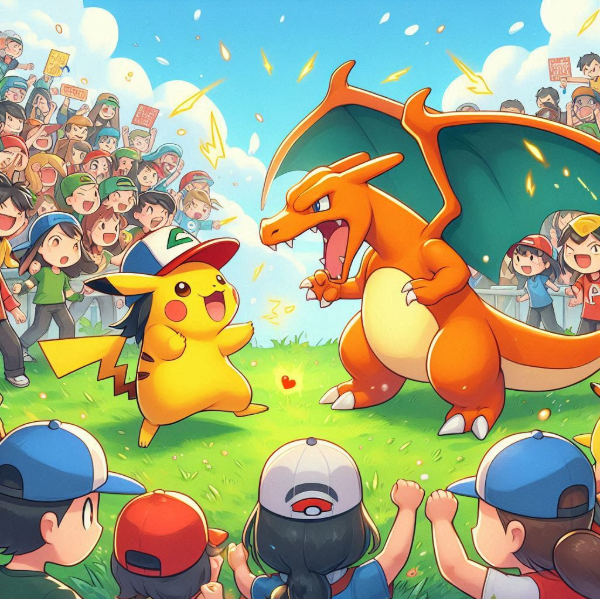


<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px"> <h2 style="color:white"><strong>PokeAPI</strong></h2> </div>


<div style="background-color:#006069; color:white; padding: 10px;">
    <strong></strong>
</div>
Met behulp van de Pokemon API kunnen stats over Pokemon worden verkregen. Hiervoor is een request nodig. Met behulp van een request wordt de benodigde data opgevraagd. In de codecell hieronder vindt u een vraag om de hoeveelheid Pokemon. De hoeveelheid Pokemon in de database wordt teruggegeven aan de hand van de sleutel "count". Dit is een van de types die je op kunt halen in de APIResourceList (PokeAPI. (n.d.).). Er wordt overigens een json-file teruggegeven. Dit is een veelgebruikt format om gestructureerde tekstuele data van internetbronnen te verkrijgen.

In [2]:
def get_total_pokemon_count():
    base_url = "https://pokeapi.co/api/v2/pokemon/"
    response = requests.get(base_url)
    data = response.json()
    return data["count"]

total_pokemon = get_total_pokemon_count()
print(f"Totaal aantal Pokémon: {total_pokemon}")

Totaal aantal Pokémon: 1304


<div style="background-color:#006069; color:white; padding: 10px;">
    <strong></strong>
</div>
De onderstaande code geeft over de Pokemon uit de API-app eigenschappen per Pokemon terug. Het id-nummer, de naam, het gewicht, het type pokemon, de stats en de mogelijke moves van die Pokemon owrden teruggegeven. De stats voor de Pokemon worden een voor een opgehaald. Als er geen volgende pokemon is, wat wordt gecheckt door middel van het APIresource type command "next" ( (PokeAPI. (n.d.).).), wordt er een DataFrame teruggegeven dat de gewilde statistieken bevat. Wij hebben voor deze statistieken in dit hoofdstuk gekozen, omdat de andere hoofdstukken al andere stats opvragen. Door te werken met een DataFrame kunnen wij de andere statistieken die op de andere manieren zijn verkregen relatief eenvoudig toevoegen aan een overkoepelend DataFrame.

In [3]:
def get_all_pokemon_data():
    base_url = "https://pokeapi.co/api/v2/pokemon/"
    all_data = []
    offset = 0
    limit = 100

    while True:
        response = requests.get(f"{base_url}?limit={limit}&offset={offset}")
        response_data = response.json()
        pokemon_list = response_data["results"]

        for pokemon in pokemon_list:
            try:
                pokemon_data = requests.get(pokemon["url"]).json()
                pokemon_entry = {
                    "id": pokemon_data["id"],
                    "name": pokemon_data["name"],
                    "weight": pokemon_data["weight"],
                    "types": [t["type"]["name"] for t in pokemon_data["types"]],
                    "stats": {stat["stat"]["name"]: stat["base_stat"] for stat in pokemon_data["stats"]},
                    "moves": [move["move"]["name"] for move in pokemon_data["moves"]],
                }
                all_data.append(pokemon_entry)
            except Exception as e:
                print(f"Fout bij ophalen van {pokemon['name']}: {e}")

        if response_data["next"] is None:
            break
        else:
            offset += limit

    return pd.DataFrame(all_data)


df_all_pokemon = get_all_pokemon_data()

<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Inspecteren van het dataframe</strong>
</div>

In [4]:
with pd.option_context('display.max_rows', None):
    display(df_all_pokemon.head(50))

,id,name,weight,types,stats,moves
0,1,bulbasaur,69,"[grass, poison]","{'hp': 45, 'attack': 49, 'defense': 49, 'speci...","[razor-wind, swords-dance, cut, bind, vine-whi..."
1,2,ivysaur,130,"[grass, poison]","{'hp': 60, 'attack': 62, 'defense': 63, 'speci...","[swords-dance, cut, bind, vine-whip, headbutt,..."
2,3,venusaur,1000,"[grass, poison]","{'hp': 80, 'attack': 82, 'defense': 83, 'speci...","[swords-dance, cut, bind, vine-whip, headbutt,..."
3,4,charmander,85,[fire],"{'hp': 39, 'attack': 52, 'defense': 43, 'speci...","[mega-punch, fire-punch, thunder-punch, scratc..."
4,5,charmeleon,190,[fire],"{'hp': 58, 'attack': 64, 'defense': 58, 'speci...","[mega-punch, fire-punch, thunder-punch, scratc..."
5,6,charizard,905,"[fire, flying]","{'hp': 78, 'attack': 84, 'defense': 78, 'speci...","[mega-punch, fire-punch, thunder-punch, scratc..."
6,7,squirtle,90,[water],"{'hp': 44, 'attack': 48, 'defense': 65, 'speci...","[mega-punch, ice-punch, mega-kick, headbutt, t..."
7,8,wartortle,225,[water],"{'hp': 59, 'attack': 63, 'defense': 80, 'speci...","[mega-punch, ice-punch, mega-kick, headbutt, t..."
8,9,blastoise,855,[water],"{'hp': 79, 'attack': 83, 'defense': 100, 'spec...","[mega-punch, ice-punch, mega-kick, headbutt, t..."
9,10,caterpie,29,[bug],"{'hp': 45, 'attack': 30, 'defense': 35, 'speci...","[tackle, string-shot, snore, bug-bite, electro..."


<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Wat zien we?</strong>
</div>
Een dataframe met hierin de eerste 50 rijen van de pokedex, hierin staan alle pokemons vermeld, welke types deze pokemons zijn, de statestieken en alle mogelijke moves die deze pokemon kan leren

<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Splitsen van de kolommen</strong>
</div>
Om de data klaar te maken voor het gebruik in modellen willen we een paar pre-processing stappen toepassen. Een belangrijke stap is het creëren van dummykolommen voor categorische variabelen. In dit geval gebruiken we een techniek die bekend staat als one-hot encoding, waarbij we de categorische waarden omzetten naar binaire kolommen. Voor de kolom 'types', die meerdere waarden kan bevatten, passen we eerst de functie dummy_types toe. Deze functie explodeert de 'types' kolom, zodat elke rij een enkel type bevat, en maakt vervolgens voor ieder uniek type een nieuwe dummykolom. Elke rij krijgt een waarde van 1 voor de kolom die overeenkomt met het type, en 0 voor de andere kolommen. Dit zorgt ervoor dat we met numerieke waarden kunnen werken in plaats van met de originele, categorische gegevens. Na het genereren van de dummykolommen wordt de oorspronkelijke 'types' kolom verwijderd, en de DataFrame wordt weer samengevoegd op basis van de 'id', waarbij de maximale waarde voor elke dummykolom wordt behouden. Hierdoor kunnen we effectief omgaan met de verschillende types zonder dat de relaties tussen de Pokémon verloren gaan.

In [5]:
def dummy_types(df):
    """
    Past one-hot encoding toe op de 'types' kolom en voegt de dummy-columns toe aan de DataFrame.

    Args:
    - df (pd.DataFrame): De DataFrame met een kolom 'types', die lijsten van types bevat.

    Returns:
    - pd.DataFrame: De oorspronkelijke DataFrame met dummy-codering van 'types'.
    """
    df = df.copy()  
    df = df.explode('types')  
    dummies = pd.get_dummies(df['types'])  
    df = pd.concat([df, dummies], axis=1)  
    
    df = df.drop(columns=['types'])  
    
    # Groepeer alle kolommen correct terug per 'id' en behoud de juiste waarden
    df = df.groupby('id', as_index=False).first() 
    df[dummies.columns] = df.groupby('id')[dummies.columns].max().reset_index(drop=True) 

    return df

def split_stats(df):
    """
    Splits the 'stats' column (which is a dictionary) into individual stat columns.
    
    The stats will be separated into the following columns: 'hp', 'attack', 'defense', 
    'special-attack', 'special-defense', and 'speed'.
    
    Args:
    - df (pd.DataFrame): The DataFrame containing the 'stats' column as a dictionary.
    
    Returns:
    - pd.DataFrame: The original DataFrame with the individual stat columns.
    """
    # Convert 'stats' dictionary into individual columns
    stats_df = df['stats'].apply(pd.Series)
    
    # Rename columns to match the specific stats
    stats_df.columns = ['hp', 'attack', 'defense', 'special-attack', 'special-defense', 'speed']
    
    # Concatenate the new stat columns with the original DataFrame
    df = pd.concat([df, stats_df], axis=1)

    
    # Drop the original 'stats' column
    df = df.drop(columns=['stats'])

    return df

def create_move_dummies(df):
    """
    Converts the 'moves' column into dummy columns, where each column represents a move, 
    with values True if the move exists for that Pokémon, and False otherwise.
    The new columns are named 'move_[MOVE_NAME]'.
    
    Args:
    - df (pd.DataFrame): The DataFrame containing the 'moves' column as a list of moves.
    
    Returns:
    - pd.DataFrame: The DataFrame with dummy columns for each move, and the original 'moves' column dropped.
    """
    # Get all unique moves across the entire DataFrame
    all_moves = set([move for sublist in df['moves'] for move in sublist])
    
    # Create a dummy column for each move
    for move in all_moves:
        df[f'move_{move}'] = df['moves'].apply(lambda moves: move in moves)
    
    # Drop the original 'moves' column
    df = df.drop(columns=['moves'])
    
    return df
    

df_all_pokemon = dummy_types(df_all_pokemon)
df_all_pokemon = split_stats(df_all_pokemon)    
df_all_pokemon = create_move_dummies(df_all_pokemon)

C:\Users\Peet\AppData\Local\Temp\ipykernel_8352\1132532771.py:69: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'move_{move}'] = df['moves'].apply(lambda moves: move in moves)
C:\Users\Peet\AppData\Local\Temp\ipykernel_8352\1132532771.py:69: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'move_{move}'] = df['moves'].apply(lambda moves: move in moves)
C:\Users\Peet\AppData\Local\Temp\ipykernel_8352\1132532771.py:69: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Inspecteren van het dataframe</strong>
</div>

In [6]:
with pd.option_context('display.max_rows', None):
    display(df_all_pokemon.head(50))


,id,name,weight,bug,dark,dragon,electric,fairy,fighting,fire,...,move_burning-bulwark,move_round,move_fire-blast,move_ancient-power,move_fury-attack,move_reversal,move_metal-sound,move_gust,move_copycat,move_instruct
0,1,bulbasaur,69,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,2,ivysaur,130,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,3,venusaur,1000,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,4,charmander,85,False,False,False,False,False,False,True,...,False,True,True,True,False,False,False,False,False,False
4,5,charmeleon,190,False,False,False,False,False,False,True,...,False,True,True,True,False,False,False,False,False,False
5,6,charizard,905,False,False,False,False,False,False,True,...,False,True,True,True,False,False,False,False,False,False
6,7,squirtle,90,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
7,8,wartortle,225,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
8,9,blastoise,855,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
9,10,caterpie,29,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Wat zien we?</strong>
</div>
Hier maken we van de eerdere dataframe een meer uitgewerkte versie waar we dummy kolommen toevoegen om alle waardes in te vullen met True of False dit betekent dat de pokemon deze specifieke waarde bezit. Deze dataframe is dus gebruiks klaar voor analyses die we kunnen maken in een voorspellend model

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px"> <h2 style="color:white"><strong>Informatie over Items, Abilities etc.</strong></h2> </div>
In dit deel van de opdracht richten we ons op het ophalen van aanvullende informatie over Pokémon, namelijk de details over items, moves, abilities en natures. Deze gegevens vormen een essentiële aanvulling op de Limitless VGC-toernooidata (Dit stuk word hierna uitgewerkt), die inzicht geven in de samenstelling van competitieve teams. Door de eigenschappen van Pokémon uit de database te koppelen aan toernooigegevens, kunnen we onder andere onderzoeken:

- Welke items worden het meest gebruikt door Pokémon in competitieve wedstrijden.
- Hoe bepaalde moves, abilities en natures samenhangen met succesvolle strategieën.
- Welke statistieken (bijvoorbeeld Attack, Defense, Speed, etc.) beïnvloed worden door de gekozen natures en hoe dat de prestaties van een Pokémon kan bepalen.

Door deze data samen te brengen, verkrijgen we een vollediger beeld van de meta binnen de competitieve Pokémon-scene en kunnen we patronen ontdekken die leiden tot een succesvolle teamcompositie.

Sinds wij geen juiste database konden vinden van de informatie die wij willen verkrijgen, hebben we gekozen om voor meedere stukken van deze opdracht te webscrapen. Hier halen we de data op van de website https://www.dittobase.com/. 

<div style="background-color:#006069; color:white; padding: 10px; border-radius: 5px; margin-bottom: 20px;"> <strong>Overzicht van Scrape-bronnen en Hun Relevantie voor Competitieve Teams</strong> </div>

### Inleiding
In competitieve Pokémon-gevechten (VGC) speelt elk onderdeel van een Pokémon – van moves en items tot abilities en natures – een cruciale rol in het bepalen van de slagkracht van een team. Naast de toernooidata van Limitless VGC, die inzicht geven in de succesformules van de beste teams, is het essentieel om de fundamentele elementen van het Pokémon-gevechtssysteem te begrijpen. Om deze reden verzamelen wij aanvullende data via webscraping uit de Dittobase-database. Deze aanvullende data stelt ons in staat om:

- Items te analyseren die tijdens een gevecht een directe invloed hebben op zowel de overlevingskansen als de aanvalskracht van een Pokémon.
- Moves te beoordelen, waarbij elke move unieke kenmerken heeft zoals base power, accuracy en bijkomende effecten, essentieel voor een optimale strategie.
- Abilities in kaart te brengen, welke passieve vaardigheden zijn die onder andere stat-boosts, immuniteiten of speciale effecten activeren in kritieke momenten.
- Natures te verwerken, die bepalen welke statistieken licht verhoogd of verlaagd worden, waardoor een Pokémon in bepaalde rollen optimaal presteert.

##### Wat zijn deze elementen eigenlijk?
##### Items:
Voorwerpen die een Pokémon tijdens een gevecht kan vasthouden of gebruiken. Items variëren van herstellende middelen (zoals potions en full restores) tot strategische stat-boosters (bijvoorbeeld Choice Band of Life Orb). De keuze van het juiste item kan in cruciale momenten het verschil maken, omdat het zowel de overlevingskansen als de aanvalskracht van een Pokémon significant kan beïnvloeden.

##### Moves: 
Acties die een Pokémon in gevechten uitvoert. Moves vallen onder verschillende categorieën, zoals damaging moves, status moves en support moves. Elke move heeft unieke eigenschappen zoals base power, accuracy en bijkomende effecten (bijvoorbeeld het veroorzaken van een statusaandoening of het verlagen van de verdediging van de tegenstander). Een zorgvuldig samengestelde move-set is essentieel voor een effectieve strategie.

##### Abilities:
Passieve vaardigheden die inherent zijn aan elke Pokémon. Abilities kunnen uiteenlopende effecten hebben, zoals het verhogen van statistieken, het bieden van immuniteit tegen bepaalde moves, of het activeren van speciale effecten wanneer de Pokémon in het gevecht komt. Deze vaardigheden zijn vaak bepalend voor hoe goed een Pokémon presteert in kritieke momenten.

##### Natures:
De nature van een Pokémon bepaalt welke statistieken licht verhoogd en welke juist verlaagd worden. Deze kleine, maar bepalende, aanpassingen beïnvloeden hoe een Pokémon presteert in verschillende rollen, waardoor het team optimaal kan worden gestructureerd.


##### Waarom Deze Elementen van Belang Zijn
Het succes in VGC is afhankelijk van een optimale synergie tussen alle componenten van een team. Door de data van items, moves, abilities en natures te combineren met de toernooidata van Limitless VGC, kunnen we:

- Inzicht Krijgen in Synergieën: We begrijpen hoe specifieke items en moves elkaar aanvullen en hoe abilities en natures samen de sterke punten van een Pokémon maximaliseren.
- Strategische Beslissingen Onderbouwen: We analyseren welke combinaties in de praktijk het meest succesvol blijken te zijn en vertalen deze inzichten naar aanbevelingen voor teamopstellingen.
- Diepgaande Analyses Uitvoeren: Door patronen en trends in de competitieve meta te ontdekken, zoals de frequentie van bepaalde moves en items bij winnende teams, kunnen we de impact van deze elementen op de uitkomst van gevechten nauwkeurig evalueren.

bron: [Battling Basics – DragonflyCave](https://www.dragonflycave.com/mechanics/battling-basics)

##### Hoe We Tot Onze Methode Zijn Gekomen
We hebben eerst geprobeerd alle data op te halen traditioneel doormiddel van Selenium en BeautifulSoup dit is wel gelukt bij de moves pagina maar bij de andere pagina's kwamen we tegen het volgende probleem. We kregen telkens bij de data slechts een beperkt aantal items (bijvoorbeeld de eerste 46 van de 1774 beschikbaar), omdat de website de volledige data dynamisch laadt via JavaScript. Dit leidde ertoe dat ons initiële scraping-proces niet alle beschikbare data kon vastleggen. Hier hebben we bijvoorbeeld geprobeerd om eerst met selenium de pagina volledig naar beneden te scrollen om alle data in te laden en dan pas te zoeken naar de juiste HTML selectors maar deze strategie werkte helaas ook niet

Na uitgebreid onderzoek naar de HTML-structuur ontdekten we dat de website gebruikmaakt van verborgen API-endpoints om de volledige datasets (zoals items, moves, abilities en natures) op te halen. Deze API’s leveren de data in JSON-formaat. Door de API-aanroepen te implementeren met de requests-bibliotheek konden we de volledige en gestructureerde datasets binnenhalen zonder afhankelijk te zijn van JavaScript-rendering.

Deze aanpak heeft ons in staat gesteld om:

- Direct toegang te krijgen tot alle beschikbare data.
- De data efficiënt om te zetten in overzichtelijke Pandas DataFrames voor verdere analyse.

Deze tekst vormt de inleiding op het gedeelte van ons project waarin we de scraping-bronnen en de daarbij horende code bespreken. Elk van de volgende codeblokken bevat de implementatie voor het ophalen van de data (items, moves, abilities en natures) via de API’s (JSON bestanden) en Webscraping, waardoor we een compleet beeld krijgen van de aanvullende Pokémon-gegevens die essentieel zijn voor de analyse van competitieve teams.
'

Beautiful Soup Documentation — Beautiful Soup 4.4.0 documentation. (n.d.). https://beautiful-soup-4.readthedocs.io/en/latest/

<div style="background-color:#006069; color:white; padding: 10px;"> <strong>Ophalen Statestieken van moves</strong> </div>


In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

class MovesScraper:
    def __init__(self, url):
        self.url = url

    def get_html(self):
        response = requests.get(self.url)
        response.raise_for_status()
        return response.text

    def parse_moves(self, html):
        soup = BeautifulSoup(html, "html.parser")
        # Zoek de tbody met de rijen (pas de class of id aan indien nodig)
        tbody = soup.find("tbody")
        moves = []
        # Doorloop elke rij met moves
        for tr in tbody.find_all("tr", class_="css-k4lnbn"):
            tds = tr.find_all("td")
            if len(tds) >= 7:
                # Naam en link
                link_tag = tds[0].find("a")
                name = link_tag.get_text(strip=True) if link_tag else tds[0].get_text(strip=True)
                link = link_tag["href"] if link_tag and "href" in link_tag.attrs else None
                # Type (bijvoorbeeld "Normal")
                move_type = tds[1].get_text(strip=True)
                # Categorie (bijvoorbeeld "Physical", "Special" of "Status")
                category_img = tds[2].find("img")
                category = category_img["alt"] if category_img and "alt" in category_img.attrs else None
                # Power, Accuracy, PP en Beschrijving
                power = tds[3].get_text(strip=True)
                accuracy = tds[4].get_text(strip=True)
                pp = tds[5].get_text(strip=True)
                description = tds[6].get_text(strip=True)
                
                moves.append({
                    "Name": name,
                    "Link": link,
                    "Type": move_type,
                    "Category": category,
                    "Power": power,
                    "Accuracy": accuracy,
                    "PP": pp,
                    "Description": description
                })
        return moves

    def to_dataframe(self, moves):
        return pd.DataFrame(moves)

    def scrape(self):
        html = self.get_html()
        moves = self.parse_moves(html)
        return self.to_dataframe(moves)

# Voorbeeld van gebruik:
if __name__ == "__main__":
    url = "https://www.dittobase.com/moves"  # Pas de URL aan indien nodig
    scraper = MovesScraper(url)
    df_moves = scraper.scrape()
    


<div style="background-color:#006069; color:white; padding: 10px;"> <strong>Inspecteren van het dataframe</strong> </div>

In [8]:
with pd.option_context('display.max_rows', None):
    display(df_moves.head(50))


,Name,Link,Type,Category,Power,Accuracy,PP,Description
0,Pound,/moves/pound,Normal,Physical,40,100,35,Pounds with fore­ legs or tail.
1,Karate Chop,/moves/karate-chop,Fighting,Physical,50,100,25,Has a high criti­ cal hit ratio.
2,Double Slap,/moves/double-slap,Normal,Physical,15,85,10,Repeatedly slaps 2-5 times.
3,Comet Punch,/moves/comet-punch,Normal,Physical,18,85,15,Repeatedly punches 2-5 times.
4,Mega Punch,/moves/mega-punch,Normal,Physical,80,85,20,A powerful punch thrown very hard.
5,Pay Day,/moves/pay-day,Normal,Physical,40,100,20,Throws coins. Gets them back later.
6,Fire Punch,/moves/fire-punch,Fire,Physical,75,100,15,A fiery punch. May cause a burn.
7,Ice Punch,/moves/ice-punch,Ice,Physical,75,100,15,An icy punch. May cause freezing.
8,Thunder Punch,/moves/thunder-punch,Electric,Physical,75,100,15,An electric punch. It may paralyze.
9,Scratch,/moves/scratch,Normal,Physical,40,100,35,Scratches with sharp claws.


<div style="background-color:#006069; color:white; padding: 10px;"> <strong>Ophalen van de items statestieken</strong> </div>

Waarom de Build ID zoeken?

In een Next.js-applicatie wordt de Build ID dynamisch gegenereerd en verandert deze regelmatig. Deze Build ID maakt deel uit van de URL's die worden gebruikt voor het ophalen van API-data. Door de Build ID automatisch op te zoeken uit de HTML, zorgen we ervoor dat onze scraping code altijd de meest actuele API-endpoints gebruikt, zonder dat we handmatig de URL hoeven aan te passen wanneer de Build ID wijzigt. Dit verhoogt de betrouwbaarheid en onderhoudbaarheid van onze data scraping-pijplijn.

In [9]:
# Stap 1: Haal de HTML op van de items-pagina
main_url = "https://www.dittobase.com/items"
response_main = requests.get(main_url)
response_main.raise_for_status()
html = response_main.text

# Stap 2: Parse de HTML en zoek naar de __NEXT_DATA__ tag
soup = BeautifulSoup(html, "html.parser")
next_data_tag = soup.find("script", id="__NEXT_DATA__")
if next_data_tag is None:
    raise ValueError("Kon de __NEXT_DATA__ tag niet vinden in de HTML.")
next_data = json.loads(next_data_tag.string)

# Stap 3: Haal de buildId op uit de __NEXT_DATA__ JSON
build_id = next_data.get("buildId")
if build_id is None:
    raise ValueError("Kon de buildId niet vinden in __NEXT_DATA__.")
print("Gevonden buildId:", build_id)

# Stap 4: Stel de API-URL samen met de huidige buildId
api_url = f"https://www.dittobase.com/_next/data/{build_id}/items.json"
print("Gebruik de API URL:", api_url)

# Stap 5: Haal de data op van het API-endpoint
response_api = requests.get(api_url)
response_api.raise_for_status()
data = response_api.json()

# Stap 6: Extraheer de items uit de JSON-respons
items = data['pageProps']['fallback']['/api/items']

# Stap 7: Maak een DataFrame met de opgehaalde items
df_items = pd.DataFrame({
    "Name": [item.get("name") for item in items],
    "Cost": [item.get("cost") for item in items],
    "Description": [item.get("description") if item.get("description") != "" else None for item in items]
})


Gevonden buildId: 0kYOYH5rsmOT6PMRnYxJR
Gebruik de API URL: https://www.dittobase.com/_next/data/0kYOYH5rsmOT6PMRnYxJR/items.json


<div style="background-color:#006069; color:white; padding: 10px;"> <strong>Inspecteren van dataframe</strong> </div>

In [10]:
with pd.option_context('display.max_rows', None):
    display(df_items.head(50))

,Name,Cost,Description
0,Master Ball,0,The best Poké Ball with the ultimate level of ...
1,Ultra Ball,800,An ultra-high-performance Poké Ball that provi...
2,Great Ball,600,"A good, high-performance Poké Ball that provid..."
3,Poké Ball,200,A device for catching wild Pokémon. It’s throw...
4,Safari Ball,0,A special Poké Ball that was used in the Safar...
5,Net Ball,1000,A somewhat different Poké Ball that is more ef...
6,Dive Ball,1000,A somewhat different Poké Ball that works espe...
7,Nest Ball,1000,A somewhat different Poké Ball that becomes mo...
8,Repeat Ball,1000,A somewhat different Poké Ball that works espe...
9,Timer Ball,1000,A somewhat different Poké Ball that becomes pr...


<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Wat zien we?</strong>
</div>
Een overzicht van alle Items in pokemon waarbij een descriptie en prijs word geleverd

<div style="background-color:#006069; color:white; padding: 10px;"> <strong>Ophalen van abilities</strong> </div>

In [11]:
# Stap 1: Haal de HTML op van de items-pagina
main_url = "https://www.dittobase.com/abilities"
response_main = requests.get(main_url)
response_main.raise_for_status()
html = response_main.text

# Stap 2: Parse de HTML en zoek naar de __NEXT_DATA__ tag
soup = BeautifulSoup(html, "html.parser")
next_data_tag = soup.find("script", id="__NEXT_DATA__")
if next_data_tag is None:
    raise ValueError("Kon de __NEXT_DATA__ tag niet vinden in de HTML.")
next_data = json.loads(next_data_tag.string)

# Stap 3: Haal de buildId op uit de __NEXT_DATA__ JSON
build_id = next_data.get("buildId")
if build_id is None:
    raise ValueError("Kon de buildId niet vinden in __NEXT_DATA__.")
print("Gevonden buildId:", build_id)

# Stap 4: Stel de API-URL samen met de huidige buildId
api_url = f"https://www.dittobase.com/_next/data/{build_id}/abilities.json"
print("Gebruik de API URL:", api_url)

# Stap 5: Haal de data op van het API-endpoint
response_api = requests.get(api_url)
response_api.raise_for_status()
data = response_api.json()

# Stap 6: Extraheer de items uit de JSON-respons
items = data['pageProps']['fallback']['/api/abilities']

# Maak een DataFrame; vul eventueel lege beschrijvingen met None
df_abilities = pd.DataFrame({
    "Name": [item.get("name") for item in items],
    "Description": [item.get("description") if item.get("description") != "" else None for item in items]
})

Gevonden buildId: 0kYOYH5rsmOT6PMRnYxJR
Gebruik de API URL: https://www.dittobase.com/_next/data/0kYOYH5rsmOT6PMRnYxJR/abilities.json


<div style="background-color:#006069; color:white; padding: 10px;"> <strong>Inspecteren van de Dataframe</strong> </div>

In [12]:
with pd.option_context('display.max_rows', None):
    display(df_abilities.head(50))

,Name,Description
0,Stench,Helps repel wild POKéMON.
1,Drizzle,Summons rain in battle.
2,Speed Boost,Gradually boosts SPEED.
3,Battle Armor,Blocks critical hits.
4,Sturdy,Negates 1-hit KO attacks.
5,Damp,Prevents self-destruction.
6,Limber,Prevents paralysis.
7,Sand Veil,Ups evasion in a sandstorm.
8,Static,Paralyzes on contact.
9,Volt Absorb,Turns electricity into HP.


<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Wat zien we?</strong>
</div>
Een dataframe met alle pokemon abilitys en beschrijving van wat deze ability doet

<div style="background-color:#006069; color:white; padding: 10px;"> <strong>Ophalen van natures</strong> </div>

In [13]:
# Stap 1: Haal de HTML op van de items-pagina
main_url = "https://www.dittobase.com/natures"
response_main = requests.get(main_url)
response_main.raise_for_status()
html = response_main.text

# Stap 2: Parse de HTML en zoek naar de __NEXT_DATA__ tag
soup = BeautifulSoup(html, "html.parser")
next_data_tag = soup.find("script", id="__NEXT_DATA__")
if next_data_tag is None:
    raise ValueError("Kon de __NEXT_DATA__ tag niet vinden in de HTML.")
next_data = json.loads(next_data_tag.string)

# Stap 3: Haal de buildId op uit de __NEXT_DATA__ JSON
build_id = next_data.get("buildId")
if build_id is None:
    raise ValueError("Kon de buildId niet vinden in __NEXT_DATA__.")
print("Gevonden buildId:", build_id)

# Stap 4: Stel de API-URL samen met de huidige buildId
api_url = f"https://www.dittobase.com/_next/data/{build_id}/natures.json"
print("Gebruik de API URL:", api_url)

# Stap 5: Haal de data op van het API-endpoint
response_api = requests.get(api_url)
response_api.raise_for_status()
data = response_api.json()

# Stap 6: Extraheer de items uit de JSON-respons
natures = data['pageProps']['fallback']['/api/natures']

# Maak een Pandas DataFrame en extraheer voor elke nature de naam,
# de stat die verlaagd wordt (Decreases) en de stat die verhoogd wordt (Increases).
df_natures = pd.DataFrame({
    "Name": [nature.get("name") for nature in natures],
    "Decreases": [nature.get("decreasedStat", {}).get("name") for nature in natures],
    "Increases": [nature.get("increasedStat", {}).get("name") for nature in natures]
})


Gevonden buildId: 0kYOYH5rsmOT6PMRnYxJR
Gebruik de API URL: https://www.dittobase.com/_next/data/0kYOYH5rsmOT6PMRnYxJR/natures.json


<div style="background-color:#006069; color:white; padding: 10px;"> <strong>Inspecteren van de Dataframe</strong> </div>

In [14]:
with pd.option_context('display.max_rows', None):
    display(df_natures.head(50))

,Name,Decreases,Increases
0,Hardy,Attack,Attack
1,Bold,Attack,Defense
2,Modest,Attack,Special Attack
3,Calm,Attack,Special Defense
4,Timid,Attack,Speed
5,Lonely,Defense,Attack
6,Docile,Defense,Defense
7,Mild,Defense,Special Attack
8,Gentle,Defense,Special Defense
9,Hasty,Defense,Speed


<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Wat zien we?</strong>
</div>
Een dataframe met alle natures en aanvullende kolommen met welke statestiek van een pokemon deze naar beneden haalt of juist omhoog haalt

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px"> <h2 style="color:white"><strong>Pokémon VGC Meta-analyse voor het voorspellende model</strong></h2> </div>

##### Projectdoel
In dit deel van het project richten we ons op het verzamelen en analyseren van gegevens over competitieve Pokémon Video Game Championships (VGC) om inzicht te krijgen in de huidige "meta" – de populaire en succesvolle teamcomposities binnen deze competitie. We gaan data van de website Limitless VGC verzamelen, waaronder informatie over de teamsamenstellingen, de gebruikte items, en de Pokémon-typen van succesvolle spelers. Door deze data op te splitsen in overzichtelijke dataframes, maken we het eenvoudiger om analyses uit te voeren en uiteindelijk een voorspellend model te bouwen.

##### Data Scraping
We scrapen eerst de algemene teamgegevens (zoals toernooi, ranking, team samenstelling, speler, etc.) en slaan deze op in één dataframe. In een tweede stap verzamelen we per team de gedetailleerde data per Pokémon: de moves, het item, de ability's, de tera type én de positie (pokemon_slot) waarin de Pokémon staat. Deze extra informatie geeft ons een compleet beeld van hoe teams zijn opgebouwd. Daarnaast springen we ook nog een stapje dieper in de data waar we informatie gaan ophalen over de pokemons zelf, welke items worden vaak gebruikt welke pokemons worden vaak samen in "Synergy" met de pokemon of welke items worden vaak gebruikt op deze pokemons

##### Data Analyse en Exploratie
Met de gestructureerde data zouden  we patronen en trends kunnen ontdekken. Bijvoorbeeld het zoeken naar populaire teamcombinaties, vaak gebruikte items en moves, en sterke synergiën tussen de Pokémon. Dit helpt ons te begrijpen welke strategieën succesvol zijn in de VGC-competitie.


<div style="background-color:#006069; color:white; padding: 10px;"> <strong>De ethische kant</strong> </div>
Bij het webscrapen is het niet alleen belangrijk om technisch werkende scripts te schrijven, maar ook om stil te staan bij de ethische aspecten van het scrapen. Vrijwel elke website heeft een robots.txt-pagina, die je kunt bereiken door achter de website-URL “/robots.txt” te plakken (bijvoorbeeld: https://limitlessvgc.com/robots.txt).

#### Wat is robots.txt?
Dit bestand geeft richtlijnen over welke delen van de website wel en niet benaderd mogen worden door webcrawlers of scrapers. Het fungeert als een soort “verkeersbord” voor bots: bepaalde directories zoals /wp-admin/ of andere gevoelige gebieden worden vaak expliciet uitgesloten. Het doel is om te voorkomen dat bots per ongeluk toegang krijgen tot admin-gebieden of andere gevoelige data, wat de veiligheid en prestaties van de website ten goede komt.

#### Waarom is dit belangrijk?

- Respect voor de website: Door de instructies in de robots.txt te respecteren, laat je zien dat je de wensen van de website-eigenaar respecteert. Dit helpt om een goede relatie te behouden en voorkomt onnodige belasting van de server.
- Veiligheid en privacy: Sommige delen van een website, zoals beheerderspagina’s of persoonlijke data, worden uitgesloten om de privacy en veiligheid van gebruikers te waarborgen. Het is dan ook belangrijk om geen gegevens te scrapen uit deze gebieden.
- Juridische en ethische overwegingen: Hoewel de regels in robots.txt niet per se juridisch bindend zijn, worden ze wel gezien als een indicatie van wat de website-eigenaar toelaat. Het negeren van deze regels kan leiden tot juridische problemen of reputatieschade, zeker als de data later publiek gebruikt of verspreid wordt.

#### Mogen wij scrapen?
In het geval van de website Limitless VGC, staat in de robots.txt aangegeven dat je in principe toegang hebt tot de meeste delen van de website, behalve naar pagina’s waar beheerdersinformatie of andere gevoelige data staan, zoals /wp-admin/. Dit betekent dat je in jouw scraping-project veilig de publieke data kunt verzamelen, zolang je de uitgesloten paden vermijdt en de server niet overbelast met te frequente verzoeken.

Kortom, zorg er altijd voor dat je je aan deze richtlijnen houdt. Niet alleen om mogelijke juridische problemen te voorkomen, maar ook omdat het simpelweg netjes is tegenover de website-eigenaren. Dit maakt deel uit van een verantwoorde en ethische benadering van webscrapen.

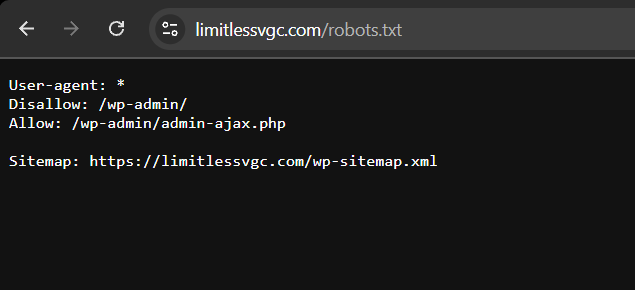

Robots.txt Introduction and guide | Google Search Central | Documentation | Google for Developers. (n.d.). Google for Developers. https://developers.google.com/search/docs/crawling-indexing/robots/intro

<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Class bouwen voor het extraheren van de toernooi data</strong>
</div>




In [15]:
class LimitlessVGCScraper:
    """
    Scraper om Pokémon teamdata te extraheren van de Limitless VGC website.
    
    Dit script doorloopt alle pagina's met teams en haalt per team de gegevens op zoals:
    - Toernooi naam
    - Plaats (ranking)
    - Team (de 6 Pokémon, aangevuld met None als er minder dan 6 zijn)
    - Speler naam
    - Teamlink (waar je meer details over het team vindt)
    - Team_id, wat nu gewoon het laatste nummer is uit de teamlink (dus '319' als de link '/teams/319' is)
    """
    
    def __init__(self, base_url, total_pages):
        """
        Initialiseert de scraper.
        
        Parameters:
        - base_url (str): De basis-URL waar de teams te vinden zijn. Bijvoorbeeld "https://limitlessvgc.com/teams?pg=".
        - total_pages (int): Het aantal pagina's dat gescraped moet worden.
        """
        self.base_url = base_url
        self.total_pages = total_pages
        self.data = []  # Hier bewaren we alle data die we gaan scrapen

    def scrape(self):
        """
        Loopt door alle pagina's en haalt de HTML-content op.
        Voor elke pagina wordt de inhoud geparsed en worden de teamgegevens eruit gehaald.
        """
        for page in range(1, self.total_pages + 1):
            url = f"{self.base_url}{page}"
            try:
                response = requests.get(url)
                response.raise_for_status()  # Check of de request goed is verlopen
                self.parse_page(response.text)
            except requests.RequestException as e:
                print(f"Er is een fout opgetreden bij het ophalen van pagina {page}: {e}")
                continue  # Ga verder met de volgende pagina

    def parse_page(self, html_content):
        """
        Parse de HTML-content van een pagina en zoekt de tabel met teamgegevens.
        
        Parameters:
        - html_content (str): De HTML-code van de pagina.
        """
        soup = BeautifulSoup(html_content, 'html.parser')
        table = soup.find('table', class_='table')
        if not table:
            return

        current_tournament = None  # Houdt bij welk toernooi we op dat moment verwerken
        
        # Loop door alle rijen in de tabel
        for row in table.find_all('tr'):
            header = row.find('th', class_='table-sub-heading')
            if header:
                # Als we een header tegenkomen, is dit de naam van het toernooi
                current_tournament = header.text.strip()
            else:
                self.parse_row(row, current_tournament)

    def parse_row(self, row, tournament):
        """
        Extraheert de data uit een enkele rij van de teamtabel.
        
        Parameters:
        - row: De HTML-rij met de teamgegevens.
        - tournament (str): De naam van het toernooi, zodat we dit meegeven aan het team.
        """
        columns = row.find_all('td')
        if len(columns) != 3:
            return  # Deze rij heeft niet de verwachte structuur; overslaan
        
        place = columns[0].text.strip()
        player_name = columns[2].text.strip()
        team = self.extract_team(columns[1])
        team += [None] * (6 - len(team))  # Zorg ervoor dat er altijd 6 items in de teamlijst zitten

        # Haal de teamlink op uit de kolom met teaminformatie
        team_link_tag = columns[1].find('a', class_='team-link')
        if team_link_tag and 'href' in team_link_tag.attrs:
            team_link = urljoin('https://limitlessvgc.com', team_link_tag['href'])
        else:
            team_link = None

        # In plaats van een random gegenereerde team_id te maken, halen we nu het laatste nummer uit de teamlink.
        # Bijvoorbeeld, als team_link 'https://limitlessvgc.com/teams/319' is, dan wordt team_id '319'.
        team_id = None
        if team_link:
            match = re.search(r'/teams/(\d+)', team_link)
            if match:
                team_id = match.group(1)

        # Voeg alle verzamelde gegevens toe aan onze data-lijst.
        # De volgorde is: toernooi, plaats, 6 Pokémon, spelernaam, teamlink en team_id.
        self.data.append([tournament, place] + team[:6] + [player_name, team_link, team_id])

    def extract_team(self, team_column):
        """
        Extraheert de namen van de Pokémon uit de image links in de teamkolom.
        
        Parameters:
        - team_column: De HTML-kolom met de teaminformatie.
        
        Returns:
        - Een lijst met de namen van de Pokémon, verkregen uit de bestandsnamen van de img-tags.
        """
        team_div = team_column.find('div', class_='vgc-team')
        if not team_div:
            return []

        team = []
        # Loop door alle spans die de Pokémon bevatten
        for span in team_div.find_all('span', class_='tt'):
            img = span.find('img')
            if img and img.get('src'):
                # De bestandsnaam (zonder extensie) is de naam van de Pokémon, bv. 'garchomp.png'
                name = img['src'].split('/')[-1].split('.')[0]
                team.append(name)
            else:
                team.append(None)
        return team

    def to_dataframe(self):
        """
        Zet de gescrapete data om in een pandas DataFrame.
        
        Returns:
        - Een DataFrame met de volgende kolommen:
          'tournament', 'place', 'pokemon_1', 'pokemon_2', 'pokemon_3', 
          'pokemon_4', 'pokemon_5', 'pokemon_6', 'player_name', 'team_link', 'team_id'
        """
        columns = [
            'tournament', 'place',
            'pokemon_1', 'pokemon_2', 'pokemon_3',
            'pokemon_4', 'pokemon_5', 'pokemon_6',
            'player_name', 'team_link', 'team_id'
        ]
        return pd.DataFrame(self.data, columns=columns)

#Gebruiken van de scraper
if __name__ == "__main__":
    scraper = LimitlessVGCScraper("https://limitlessvgc.com/teams?pg=", 25)
    
    # Start het scrapen van de data
    scraper.scrape()
    
    # Converteer de verzamelde data naar een pandas DataFrame
    df = scraper.to_dataframe()


<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Toelichting tot de Code</strong>
</div>
Dit script automatiseerd het process van het verzamelen van competitieve Pokémon-team gegevens van de Limitless VGC-website. Dit is een soort van stap 1 van dit deel, we zijn van plan de rest van de data die we kunnen scrapen op te delen in 1 of meer verschillende dataframes omdat dit zorgt voor een betere overzichtelijkheid van data. Het dataframe dat we hierna gaan bouwen is de extra data die de website te bieden heeft per pokemon, deze data bevat bijvoorbeeld de moves van de pokemon en het item dat de pokemon vasthoudt. We scrapen nu pagina's 1 tot 25 sinds dit alleen de data bevat van de pokemon versie "Scarlet en Violet"

Een probleem waar we eerst tegen aan liepen tijden het ophalen van de data was dat de 'data-original-title' attributen, die de namen van de Pokémon bevatten, niet beschikbaar waren omdat ze dynamisch via JavaScript worden geladen, dit komt denk ik omdat er ook een link zit vastgeplakt aan de teams om de meer gedetaileerde informatie te krijgen per pokemon. Aangezien de 'requests' bibliotheek geen JavaScript uitvoert, konden we deze gegevens niet ophalen. Om dit op te lossen, hebben we de Pokémon-namen geëxtraheerd uit de 'src' attributen van de 'img' tags binnen elk Pokémon-item. De bestandsnamen van deze afbeeldingen bevatten namelijk de namen van de Pokémon. Door de bestandsnamen te parseren, konden we de namen verkrijgen en het script laten werken zoals bedoeld.

Wat is nog een valkuil aan de code?

Ik heb het nog niet werkend gekregen om ervoor te zorgen dat het script weet hoeveel pagina's er zijn, dus stel je voor ze voegen later meer data toe en dit zal ervoor zorgen dat er meer pagina's komen moet je handmatig het aantal pagina's aanpassen. Dit is echter niet echt een probleem sinds we niet persé streven naar volledige automatisering

In [16]:
df


,tournament,place,pokemon_1,pokemon_2,pokemon_3,pokemon_4,pokemon_5,pokemon_6,player_name,team_link,team_id
0,"28th September 2024 - Regional Joinville, Brazil",1st,garchomp,dragonite,amoonguss,incineroar,ninetales-alola,kingambit,Gabriel Agati,https://limitlessvgc.com/teams/319,319
1,"28th September 2024 - Regional Joinville, Brazil",2nd,dragonite,ninetales-alola,amoonguss,garchomp,incineroar,kingambit,Sebastian Escalante,https://limitlessvgc.com/teams/421,421
2,"28th September 2024 - Regional Joinville, Brazil",3rd,gastrodon,maushold,volcarona,sneasler,kingambit,baxcalibur,Juan Salerno,https://limitlessvgc.com/teams/422,422
3,"28th September 2024 - Regional Joinville, Brazil",4th,primarina,vivillon,porygon2,garchomp,gholdengo,incineroar,Luiz Lima,https://limitlessvgc.com/teams/423,423
4,"28th September 2024 - Regional Joinville, Brazil",5th,annihilape,basculegion,archaludon,amoonguss,pelipper,maushold,João Gonçalves,https://limitlessvgc.com/teams/424,424
...,...,...,...,...,...,...,...,...,...,...,...
620,"7th January 2023 - Regional San Diego, USA",24th,sylveon,annihilape,armarouge,talonflame,maushold,meowscarada,Dawei Si,https://limitlessvgc.com/teams/275,275
621,"7th January 2023 - Regional San Diego, USA",25th,salamence,gholdengo,armarouge,indeedee-f,skeledirge,breloom,Nathan Ortiz,https://limitlessvgc.com/teams/276,276
622,"7th January 2023 - Regional San Diego, USA",26th,hydreigon,annihilape,arcanine,maushold,rotom-wash,amoonguss,Joshua Lorcy,https://limitlessvgc.com/teams/277,277
623,"7th January 2023 - Regional San Diego, USA",27th,azumarill,gholdengo,dragonite,maushold,skeledirge,meowscarada,Jonathan Zuniga,https://limitlessvgc.com/teams/278,278


<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Wat zien we?</strong>
</div>
Een overzicht van de "Rankings" van spelers over alle toernooien die zijn gespeelt in de game Scarlet en Violet. Hier is bewust deze game voor gekozen omdat hier de meeste data over is te vinden van competieve matches, dit is de meest gespeelde game voor competetief pokemon op dit moment. Hier worden de pokemons in de teams vermeld, wie de speler is en de link naar de team samenstelling

<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>Visualisaties</strong></h2>
</div>


<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Visualisatie om te kijken naar wat de meest gebruikte pokemons zijn in de VGC</strong>
</div>

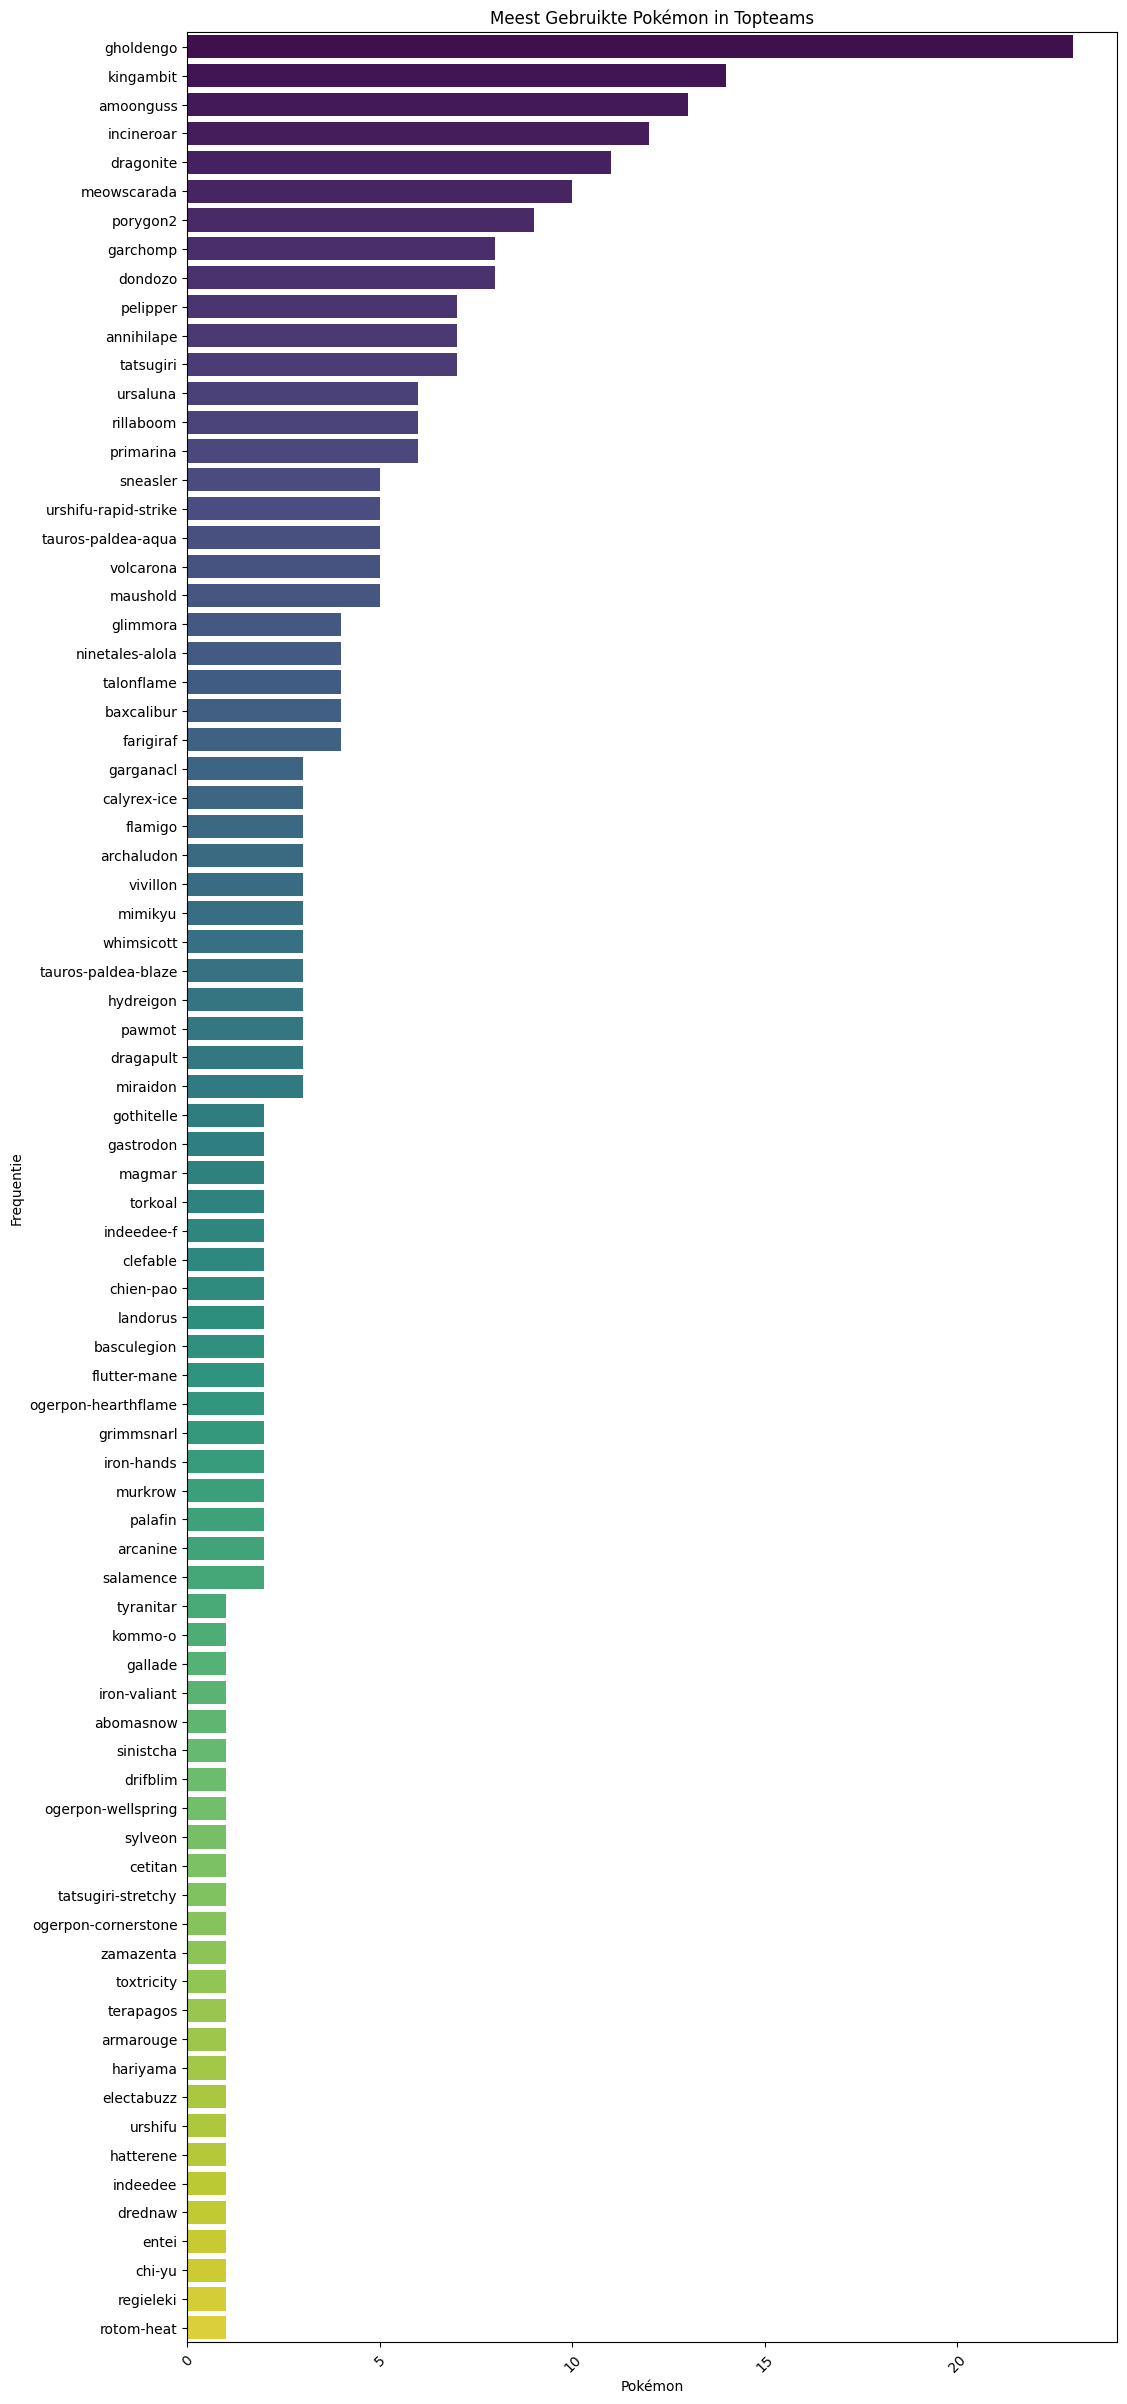

In [17]:
# Zet de data om van brede naar lange vorm
melted_df = df.melt(id_vars=['tournament', 'place', 'player_name'],
                    value_vars=['pokemon_1', 'pokemon_2', 'pokemon_3', 'pokemon_4', 'pokemon_5', 'pokemon_6'],
                    var_name='team_slot', value_name='pokemon')

# Filter de topteams (bijv. top 8)
top_places = ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th']
top_teams = melted_df[melted_df['place'].isin(top_places)]

# Bereken de frequentie van elke Pokémon in de topteams
top_pokemon_counts = top_teams['pokemon'].value_counts()

# Visualiseer de meest gebruikte Pokémon in topteams
plt.figure(figsize=(12, 30))
sns.barplot(y=top_pokemon_counts.index, x=top_pokemon_counts.values, palette='viridis')
plt.title('Meest Gebruikte Pokémon in Topteams')
plt.xlabel('Pokémon')
plt.ylabel('Frequentie')
plt.xticks(rotation=45)
plt.show()


<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Mogelijkheid van visualisatie na het mergen van de databronnen</strong>
</div>
Hier kunnen we dus bijvoorbeeld de data die we van een andere databron halen, zeg bijvoorbeeld de API. Gebruiken om visualisaties zoals dit te maken, dit is niet een accurate tabel meer een voorbeeld om te laten zien wat we kunnen doen

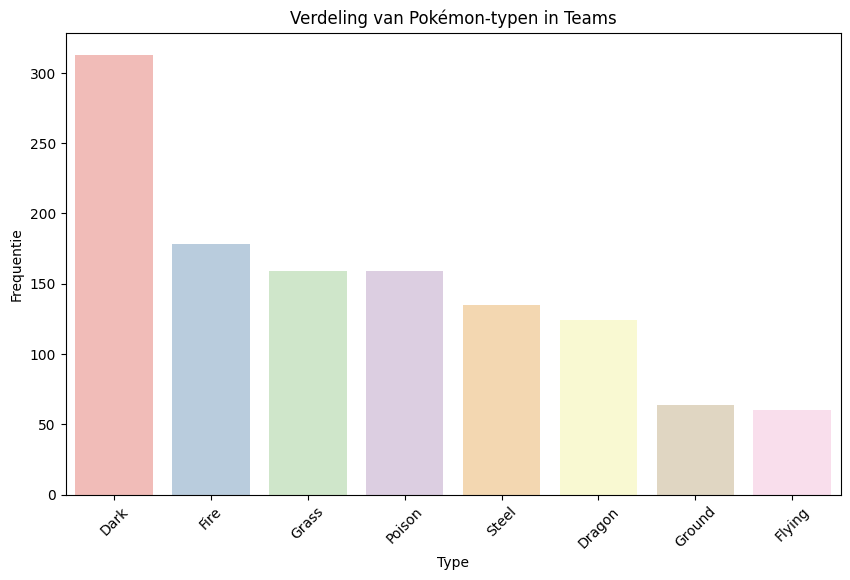

In [18]:
# Voorbeeld DataFrame met Pokémon-typen
pokemon_types = pd.DataFrame({
    'pokemon': ['garchomp', 'dragonite', 'amoonguss', 'incineroar', 'kingambit'],
    'type': ['Dragon/Ground', 'Dragon/Flying', 'Grass/Poison', 'Fire/Dark', 'Dark/Steel']
    # Voeg hier alle benodigde Pokémon en hun typen toe
})

# Zet data om naar lange vorm
melted_df = df.melt(id_vars=['tournament', 'place', 'player_name'],
                    value_vars=[f'pokemon_{i}' for i in range(1,7)],
                    var_name='team_slot', value_name='pokemon')

# Voeg typen toe aan de Pokémon
melted_df = melted_df.merge(pokemon_types, on='pokemon', how='left')

# Splits typen bij '/'
melted_df['type'] = melted_df['type'].str.split('/')

# Explodeer de typen
type_df = melted_df.explode('type')

# Bereken de frequentie van elk type
type_counts = type_df['type'].value_counts()

# Visualiseer de verdeling van typen
plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Pastel1')
plt.title('Verdeling van Pokémon-typen in Teams')
plt.xlabel('Type')
plt.ylabel('Frequentie')
plt.xticks(rotation=45)
plt.show()


<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>Scrapen van de Detail pagina per team</strong></h2>
</div>


In [19]:
class TeamDetailScraper:
    """
    Scraper voor het extraheren van Pokémon details (moves, items, etc.) per teampagina.
    
    Deze klasse haalt de detailpagina van een team op en extraheert voor elke Pokémon:
      - De Pokémon naam en de link naar de Pokémon detailpagina.
      - De details zoals item, ability en tera type.
      - De moves (maximaal 4, aangevuld met None als er minder moves zijn).
      - De pokemon_slot: de volgorde waarin de Pokémon op de teampagina staat, wat handig kan zijn voor
        het opbouwen van een optimaal team.
        
    Verder wordt er vanuit gegaan dat de team_id als cijfers in de team_link staat. Dus als de team_link
    bijvoorbeeld 'https://limitlessvgc.com/teams/319' is, dan is de team_id '319'.
    """
    
    def __init__(self, base_url="https://limitlessvgc.com"):
        """
        Initialiseert de TeamDetailScraper.
        
        Parameters:
            base_url (str): De basis-URL van de website. Standaard staat deze op "https://limitlessvgc.com".
        """
        self.base_url = base_url
        self.data = []  # Hier slaan we de gescrapete Pokémon details op

    def scrape_team(self, team_link, team_id, player_name=None, tournament=None):
        """
        Haalt de teampagina op en extraheert per Pokémon de gewenste details.
        
        Parameters:
            team_link (str): De URL van de teampagina.
            team_id (str): De unieke ID van het team, zoals overgenomen uit de team_link (dus de cijfers).
            player_name (str): (Optioneel) Naam van de speler.
            tournament (str): (Optioneel) Naam van het toernooi.
        """
        try:
            response = requests.get(team_link)
            response.raise_for_status()  # Check of de request succesvol is
        except requests.RequestException as e:
            print(f"Fout bij het ophalen van {team_link}: {e}")
            return  # Ga verder met de volgende team_link als er een fout optreedt
        
        soup = BeautifulSoup(response.text, "html.parser")
        
        # Zoek alle entries van Pokémon op de teampagina.
        team_entries = soup.find_all("div", class_="teamsheet-entry")
        if not team_entries:
            print(f"Geen Pokémon entries gevonden op {team_link}")
        
        # Doorloop alle gevonden Pokémon entries en noteer hun positie (pokemon_slot)
        for slot, entry in enumerate(team_entries, start=1):
            # --- Pokémon naam en link ---
            name_div = entry.find("div", class_="teamsheet-pokemon-name")
            if name_div:
                # De <a>-tag bevat de naam van de Pokémon, bijvoorbeeld "Garchomp"
                a_tag = name_div.find("a", class_="pokemon-link")
                if a_tag:
                    pokemon_name = a_tag.text.strip()
                    pokemon_link = urljoin(self.base_url, a_tag.get("href", ""))
                else:
                    pokemon_name = None
                    pokemon_link = None
            else:
                pokemon_name = None
                pokemon_link = None

            # --- Pokémon details: item, ability en tera type ---
            details_div = entry.find("div", class_="teamsheet-pokemon-details")
            if details_div:
                p_tags = details_div.find_all("p")
                # Eerste <p> bevat het item (bijv. "Choice Band")
                if len(p_tags) >= 1:
                    try:
                        item = p_tags[0].contents[0].strip()
                    except Exception:
                        item = None
                else:
                    item = None

                # Tweede <p> bevat de ability (bijv. "Ability: Rough Skin")
                if len(p_tags) >= 2:
                    ability_text = p_tags[1].text.strip()
                    ability = ability_text[len("Ability:"):].strip() if ability_text.lower().startswith("ability:") else ability_text
                else:
                    ability = None

                # Derde <p> bevat de tera type (bijv. "Tera Type: Steel")
                if len(p_tags) >= 3:
                    tera_text = p_tags[2].text.strip()
                    tera_type = tera_text[len("Tera Type:"):].strip() if tera_text.lower().startswith("tera type:") else tera_text
                else:
                    tera_type = None
            else:
                item = ability = tera_type = None

            # --- Pokémon moves ---
            moves_div = entry.find("div", class_="teamsheet-attacks")
            moves = []
            if moves_div:
                # Iedere <p> bevat één move
                for p in moves_div.find_all("p"):
                    move = p.text.strip()
                    if move:
                        moves.append(move)
            # Zorg ervoor dat er altijd 4 moves worden opgeslagen, vul aan met None als er minder zijn
            while len(moves) < 4:
                moves.append(None)
            if len(moves) > 4:
                moves = moves[:4]

            # Voeg alle gegevens toe aan de data-lijst, inclusief het pokemon_slot (de volgorde)
            self.data.append({
                "team_id": team_id,         # team_id moet al een string met cijfers zijn, bv. '319'
                "team_link": team_link,
                "player_name": player_name,
                "tournament": tournament,
                "pokemon_slot": slot,       # De positie van de Pokémon in het team (1 t/m 6)
                "pokemon_name": pokemon_name,
                "pokemon_link": pokemon_link,
                "item": item,
                "ability": ability,
                "tera_type": tera_type,
                "move_1": moves[0],
                "move_2": moves[1],
                "move_3": moves[2],
                "move_4": moves[3]
            })

    def to_dataframe(self):
        """
        Zet de gescrapete data om in een pandas DataFrame.
        
        Returns:
            Een DataFrame met alle gescrapete Pokémon details, inclusief de volgende kolommen:
                - team_id, team_link, player_name, tournament, pokemon_slot,
                - pokemon_name, pokemon_link, item, ability, tera_type, move_1, move_2, move_3, move_4
        """
        return pd.DataFrame(self.data)

#Zoeken van all team linkjes die we data bevat (En niet leeg is)
team_links_df = df[df['team_link'].notnull()]

# Maak een instantie van de TeamDetailScraper.
team_detail_scraper = TeamDetailScraper()

# Loop door elke team_link en haal de details op.
for idx, row in team_links_df.iterrows():
    team_link = row['team_link']
    team_id = row['team_id']  
    player_name = row.get('player_name')  
    tournament = row.get('tournament')    
    team_detail_scraper.scrape_team(team_link, team_id, player_name, tournament)

# Converteer de verzamelde data naar een DataFrame.
details_df = team_detail_scraper.to_dataframe()

<div style="background-color:#006069; color:white; padding: 10px;"> <strong>Toelichting tot de Code (TeamDetailScraper)</strong> </div>
Dit script automatiseert het proces van het verzamelen van extra details per Pokémon uit de teampagina’s van de Limitless VGC-website. Terwijl het eerste script de algemene teamgegevens verzamelde, gaan we met dit tweede script per team de specifieke details van elke Pokémon scrapen. Denk hierbij aan de moves, het item dat de Pokémon vasthoudt, de ability, en de tera type. Bovendien voegen we de pokemon_slot toe, zodat we weten in welke volgorde de Pokémon in het team staan – dit kan namelijk van belang zijn bij het samenstellen van een optimaal team. Welke pokemon wil je dat het gevecht opent?



In [20]:
details_df

,team_id,team_link,player_name,tournament,pokemon_slot,pokemon_name,pokemon_link,item,ability,tera_type,move_1,move_2,move_3,move_4
0,319,https://limitlessvgc.com/teams/319,Gabriel Agati,"28th September 2024 - Regional Joinville, Brazil",1,Garchomp,https://limitlessvgc.com/pokemon/garchomp,Choice Band,Rough Skin,Steel,Rock Slide,Stomping Tantrum,Dragon Claw,Earthquake
1,319,https://limitlessvgc.com/teams/319,Gabriel Agati,"28th September 2024 - Regional Joinville, Brazil",2,Dragonite,https://limitlessvgc.com/pokemon/dragonite,Lum Berry,Multiscale,Flying,Protect,Extreme Speed,Tera Blast,Low Kick
2,319,https://limitlessvgc.com/teams/319,Gabriel Agati,"28th September 2024 - Regional Joinville, Brazil",3,Amoonguss,https://limitlessvgc.com/pokemon/amoonguss,Sitrus Berry,Regenerator,Water,Spore,Pollen Puff,Clear Smog,Rage Powder
3,319,https://limitlessvgc.com/teams/319,Gabriel Agati,"28th September 2024 - Regional Joinville, Brazil",4,Incineroar,https://limitlessvgc.com/pokemon/incineroar,Safety Goggles,Intimidate,Ghost,Parting Shot,Flare Blitz,Knock Off,Fake Out
4,319,https://limitlessvgc.com/teams/319,Gabriel Agati,"28th September 2024 - Regional Joinville, Brazil",5,Alolan Ninetales,https://limitlessvgc.com/pokemon/ninetales-alola,Choice Specs,Snow Warning,Ice,Blizzard,Ice Beam,Moonblast,Freeze-Dry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,279,https://limitlessvgc.com/teams/279,James Baek,"7th January 2023 - Regional San Diego, USA",3,Talonflame,https://limitlessvgc.com/pokemon/talonflame,Life Orb,Gale Wings,Flying,Brave Bird,Flare Blitz,Tailwind,Protect
4371,279,https://limitlessvgc.com/teams/279,James Baek,"7th January 2023 - Regional San Diego, USA",4,Hydreigon,https://limitlessvgc.com/pokemon/hydreigon,Scope Lens,Levitate,Steel,Draco Meteor,Dark Pulse,Focus Energy,Protect
4372,279,https://limitlessvgc.com/teams/279,James Baek,"7th January 2023 - Regional San Diego, USA",5,Glimmora,https://limitlessvgc.com/pokemon/glimmora,Choice Specs,Toxic Debris,Grass,Power Gem,Sludge Bomb,Earth Power,Energy Ball
4373,279,https://limitlessvgc.com/teams/279,James Baek,"7th January 2023 - Regional San Diego, USA",6,Paldean Tauros Aqua Breed,https://limitlessvgc.com/pokemon/tauros-paldea...,Safety Goggles,Intimidate,Water,Raging Bull,Close Combat,Aqua Jet,Protect


<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Vergelijken van de dataframes om te checken of alles klopt</strong>
</div>


In [21]:
print(len(df))
print(len(details_df["team_id"].unique()))

625
625


<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>Visualisaties</strong></h2>
</div>


<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Top 10 meest gebruikte items en percentage ten opzichte van het geheel</strong>
</div>


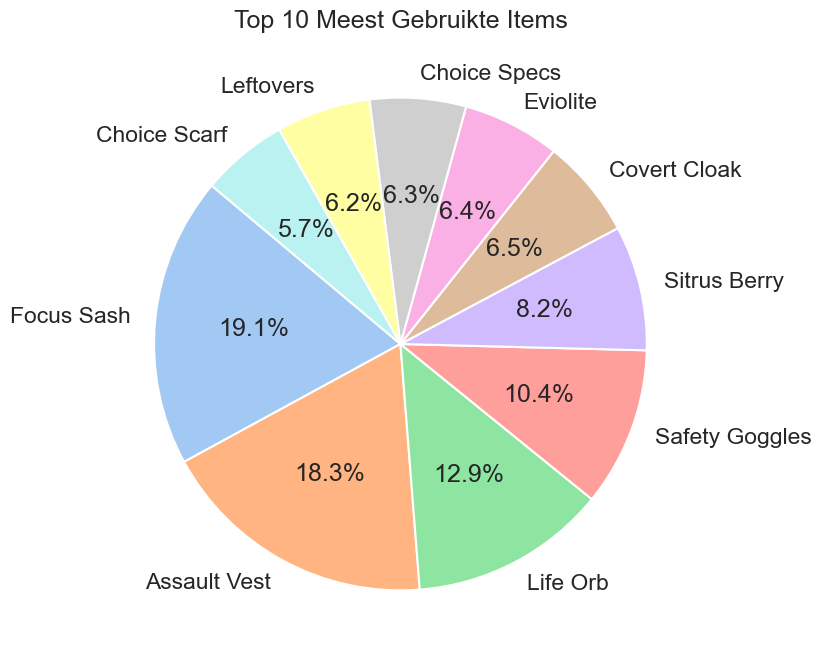

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")

# Visualisatie: Top 10 Verhouding van Items
plt.figure(figsize=(8, 8))
# Bereken de frequenties en pak de top 10 meest gebruikte items
item_counts_top10 = details_df['item'].value_counts().dropna().head(10)
plt.pie(item_counts_top10, labels=item_counts_top10.index, autopct="%1.1f%%", startangle=140, 
        colors=sns.color_palette("pastel", len(item_counts_top10)))
plt.title("Top 10 Meest Gebruikte Items")
plt.show()


<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Vergelijken van de dataframes om te checken of alles klopt</strong>
</div>


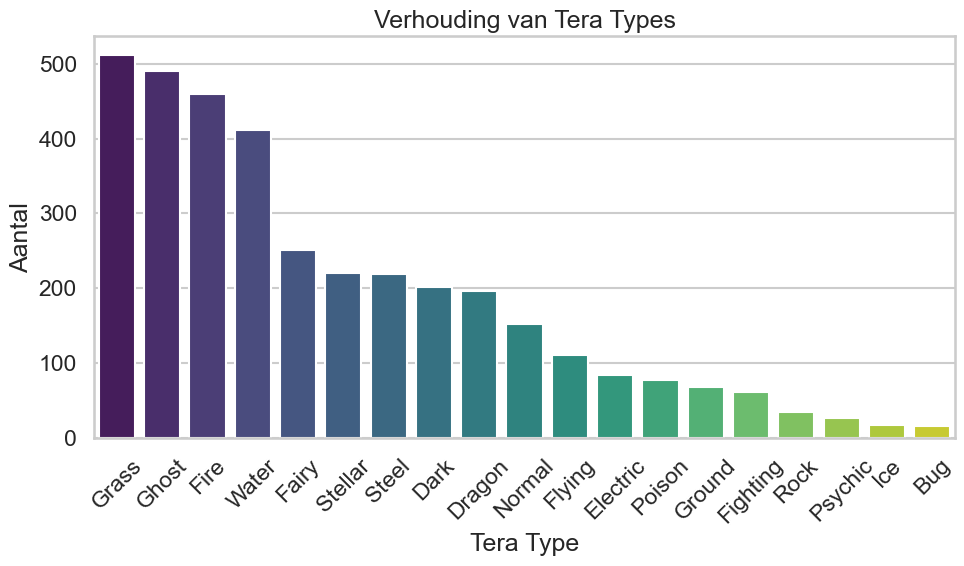

In [23]:
plt.figure(figsize=(10, 6))  # Grotere breedte voor de bar chart
tera_counts = details_df['tera_type'].value_counts().dropna()
sns.barplot(x=tera_counts.index, y=tera_counts.values, palette="viridis")
plt.title("Verhouding van Tera Types")
plt.xlabel("Tera Type")
plt.ylabel("Aantal")
plt.xticks(rotation=45)  # Roteer de labels zodat ze goed leesbaar zijn
plt.tight_layout()
plt.show()

<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Vergelijken van de dataframes om te checken of alles klopt</strong>
</div>


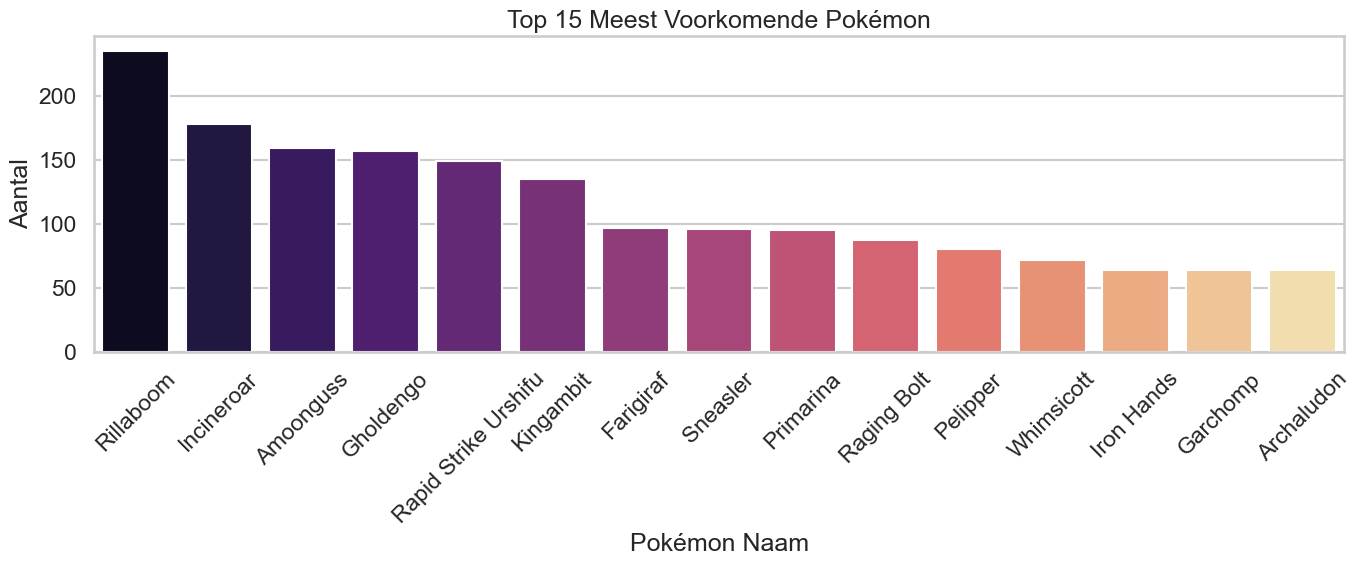

In [24]:
plt.figure(figsize=(14, 6))
pokemon_counts = details_df['pokemon_name'].value_counts().dropna().head(15)
sns.barplot(x=pokemon_counts.index, y=pokemon_counts.values, palette="magma")
plt.title("Top 15 Meest Voorkomende Pokémon")
plt.xlabel("Pokémon Naam")
plt.ylabel("Aantal")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>Scrapen van de Detail pagina per Pokemon</strong></h2>
</div>


In [25]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

class PokemonDetailScraper:
    """
    Scraper voor het extraheren van gedetailleerde informatie van een Pokémon-pagina.
    
    Met behulp van de unieke pokemon_link haalt deze scraper:
      - De infobox-statistieken (zoals Totals, PTS, Top 8 count voor Regional en IC/Worlds).
      - De tabel met Team Partners en Items (uit de flex-50 boxen).
      - De tabellen met Attacks, Tera Types en Abilities (uit de tabellen met class "pokemon-stats-col3").
    """
    
    def __init__(self, base_url="https://limitlessvgc.com"):
        """
        Initialiseert de PokemonDetailScraper.
        
        Parameters:
            base_url (str): De basis-URL van de website (standaard "https://limitlessvgc.com").
        """
        self.base_url = base_url
        # Sla per pokemon_link de gescrapete data op (om dubbele requests te voorkomen)
        self.data = {}
    
    def scrape_pokemon(self, pokemon_link):
        """
        Haalt de detailpagina van een Pokémon op en extraheert de gewenste informatie.
        
        Parameters:
            pokemon_link (str): De URL naar de Pokémon-detailpagina.
        """
        if pokemon_link in self.data:
            return  # Deze pagina is al gescrapet
        
        try:
            response = requests.get(pokemon_link)
            response.raise_for_status()
        except requests.RequestException as e:
            print(f"Fout bij het ophalen van {pokemon_link}: {e}")
            return
        
        soup = BeautifulSoup(response.text, "html.parser")
        
        # --- 1. Infobox-statistieken ---
        infobox = soup.find("div", class_="infobox-content")
        if infobox:
            # We proberen de infobox-heading uit te lezen, maar we gebruiken deze niet als primaire bron.
            heading_div = infobox.find("div", class_="infobox-heading")
            # Als deze leeg is, gebruiken we de URL.
            infobox_heading = heading_div.text.strip() if heading_div else None
            text_div = infobox.find("div", class_="infobox-text")
            infobox_lines = [p.get_text(separator=" ", strip=True) for p in text_div.find_all("p")] if text_div else []
        else:
            infobox_heading = None
            infobox_lines = []
        
        # Pokémon-naam wordt altijd afgeleid uit de URL:
        pokemon_name = pokemon_link.rstrip("/").split("/")[-1]
        
        # --- 2. Team Partners en Items (uit de flex-50 boxen) ---
        team_partners = []
        items = []
        for div in soup.find_all("div", class_="pokemon-stats-box flex-50"):
            header = div.find("th")
            if header:
                header_text = header.get_text(strip=True)
                table = div.find("table")
                if not table:
                    continue
                tbody = table.find("tbody")
                if not tbody:
                    continue
                rows = tbody.find_all("tr")
                if "Team Partners" in header_text:
                    for row in rows:
                        cols = row.find_all("td")
                        if len(cols) >= 4:
                            rank = cols[0].text.strip()
                            partner_a = cols[2].find("a")
                            partner_name = partner_a.text.strip() if partner_a else cols[2].text.strip()
                            usage = cols[3].text.strip()
                            team_partners.append({
                                "rank": rank,
                                "partner_name": partner_name,
                                "usage": usage
                            })
                elif "Items" in header_text:
                    for row in rows:
                        cols = row.find_all("td")
                        if len(cols) >= 4:
                            rank = cols[0].text.strip()
                            item_name = cols[2].text.strip()
                            usage = cols[3].text.strip()
                            items.append({
                                "rank": rank,
                                "item": item_name,
                                "usage": usage
                            })
        
        # --- 3. Attacks, Tera Types en Abilities ---
        attacks = []
        tera_types = []
        abilities = []
        # Zoek naar alle tabellen met class "pokemon-stats-col3"
        tables = soup.find_all("table", class_="pokemon-stats-col3")
        for table in tables:
            header = table.find("th")
            if not header:
                continue
            header_text = header.get_text(strip=True)
            tbody = table.find("tbody")
            if not tbody:
                continue
            rows = tbody.find_all("tr")
            if "Attacks" in header_text:
                for row in rows:
                    cols = row.find_all("td")
                    if len(cols) >= 3:
                        rank = cols[0].text.strip()
                        attack = cols[1].text.strip()
                        usage = cols[2].text.strip()
                        attacks.append({
                            "rank": rank,
                            "attack": attack,
                            "usage": usage
                        })
            elif "Tera Types" in header_text:
                for row in rows:
                    cols = row.find_all("td")
                    if len(cols) >= 3:
                        rank = cols[0].text.strip()
                        tera = cols[1].text.strip()
                        usage = cols[2].text.strip()
                        tera_types.append({
                            "rank": rank,
                            "tera_type": tera,
                            "usage": usage
                        })
            elif "Abilities" in header_text:
                for row in rows:
                    cols = row.find_all("td")
                    if len(cols) >= 3:
                        rank = cols[0].text.strip()
                        ability = cols[1].text.strip()
                        usage = cols[2].text.strip()
                        abilities.append({
                            "rank": rank,
                            "ability": ability,
                            "usage": usage
                        })
        
        # Sla alle gegevens op in de data-dictionary, gekoppeld aan de pokemon_link.
        self.data[pokemon_link] = {
            "pokemon_name": pokemon_name,
            "infobox_lines": infobox_lines,
            "team_partners": team_partners,
            "items": items,
            "attacks": attacks,
            "tera_types": tera_types,
            "abilities": abilities
        }
    
    def get_data(self):
        """
        Retourneert de gescrapete gegevens.
        
        Returns:
            Een dictionary waarbij de key de pokemon_link is en de value de gescrapete details.
        """
        return self.data


<div style="background-color:#006069; color:white; padding: 10px;"> <strong>Toelichting tot de Code</strong> </div>
Dit script automatiseert het proces van het verzamelen van gedetailleerde informatie per Pokémon van de Limitless VGC-website. Terwijl we in een eerder deel de algemene teamgegevens scrapten, richten we ons hier op de extra data per Pokémon, zoals de infobox-statistieken, de tabellen met Team Partners en Items (uit de flex-50 boxen) en de tabellen met Attacks, Tera Types en Abilities (uit de tabellen met class "pokemon-stats-col3").
|
Verder worden de verkregen gegevens vervolgens opgesplitst in verschillende DataFrames zodat je later per categorie (algemeen, team partners, items, attacks, tera types, abilities) eenvoudig kunt analyseren en visualiseren. Dit zorgt ervoor in mijn mening dat je een beter en overzichterlijk overzicht creërt dat ervoor zorgt dat je beter bij specifieke informatie kunt komen. Al wil je ook specifieke data over 1 pokemon kan je dit gemakkelijk filteren op "pokemon_name"



In [26]:
import pandas as pd
from IPython.display import display

#Hier halen we van de vorige dataframe de pokemon_links op om verdere specifieke informatie op te halen van pokemons
unique_pokemon_links = details_df['pokemon_link'].dropna().unique()

pokemon_scraper = PokemonDetailScraper()
for link in unique_pokemon_links:
    pokemon_scraper.scrape_pokemon(link)
pokemon_details = pokemon_scraper.get_data()

# Maak lege lijsten voor de verschillende categorieën
general_data = []
team_partners_data = []
items_data = []
attacks_data = []
tera_types_data = []
abilities_data = []

# Loop over de gescrapete data en vul de lijsten
for link, details in pokemon_details.items():
    # Algemene gegevens
    general_data.append({
        "pokemon_link": link,
        "pokemon_name": details.get("pokemon_name"),  # Altijd afgeleid uit de URL
        "infobox_details": " | ".join(details.get("infobox_lines", []))
    })
    
    # Team Partners
    for partner in details.get("team_partners", []):
        partner_entry = partner.copy()
        partner_entry["pokemon_link"] = link
        partner_entry["pokemon_name"] = details.get("pokemon_name")
        team_partners_data.append(partner_entry)
    
    # Items
    for item in details.get("items", []):
        item_entry = item.copy()
        item_entry["pokemon_link"] = link
        item_entry["pokemon_name"] = details.get("pokemon_name")
        items_data.append(item_entry)
    
    # Attacks
    for attack in details.get("attacks", []):
        attack_entry = attack.copy()
        attack_entry["pokemon_link"] = link
        attack_entry["pokemon_name"] = details.get("pokemon_name")
        attacks_data.append(attack_entry)
    
    # Tera Types
    for tera in details.get("tera_types", []):
        tera_entry = tera.copy()
        tera_entry["pokemon_link"] = link
        tera_entry["pokemon_name"] = details.get("pokemon_name")
        tera_types_data.append(tera_entry)
    
    # Abilities
    for ability in details.get("abilities", []):
        ability_entry = ability.copy()
        ability_entry["pokemon_link"] = link
        ability_entry["pokemon_name"] = details.get("pokemon_name")
        abilities_data.append(ability_entry)

# Zet de lijsten om in DataFrames
df_general = pd.DataFrame(general_data)
df_team_partners = pd.DataFrame(team_partners_data)
df_items_pokemon = pd.DataFrame(items_data)
df_attacks = pd.DataFrame(attacks_data)
df_tera_types = pd.DataFrame(tera_types_data)
df_abilities_pokemon = pd.DataFrame(abilities_data)

# Display de DataFrames 
display(df_general)
display(df_team_partners)
display(df_items_pokemon)
display(df_attacks)
display(df_tera_types)
display(df_abilities_pokemon)


,pokemon_link,pokemon_name,infobox_details
0,https://limitlessvgc.com/pokemon/garchomp,garchomp,"Totals: 185,000 | 5183 PTS | Top 8 count: | Re..."
1,https://limitlessvgc.com/pokemon/dragonite,dragonite,"Totals: 245,500 | 4459 PTS | Top 8 count: | Re..."
2,https://limitlessvgc.com/pokemon/amoonguss,amoonguss,"Totals: 714,500 | 14139 PTS | Top 8 count: | R..."
3,https://limitlessvgc.com/pokemon/incineroar,incineroar,"Totals: 913,750 | 15726 PTS | Top 8 count: | R..."
4,https://limitlessvgc.com/pokemon/ninetales-alola,ninetales-alola,"Totals: 79,250 | 1726 PTS | Top 8 count: | Reg..."
...,...,...,...
179,https://limitlessvgc.com/pokemon/abomasnow,abomasnow,"Totals: 1,750 | 540 PTS | Top 8 count: | Regio..."
180,https://limitlessvgc.com/pokemon/rotom-heat,rotom-heat,"Totals: 17,750 | 851 PTS | Top 8 count: | Regi..."
181,https://limitlessvgc.com/pokemon/rotom-wash,rotom-wash,"Totals: 35,250 | 1507 PTS | Top 8 count: | Reg..."
182,https://limitlessvgc.com/pokemon/scizor,scizor,"Totals: 3,000 | 599 PTS | Top 8 count: | Regio..."


,rank,partner_name,usage,pokemon_link,pokemon_name
0,1,Gholdengo,52.56%,https://limitlessvgc.com/pokemon/garchomp,garchomp
1,2,Incineroar,43.59%,https://limitlessvgc.com/pokemon/garchomp,garchomp
2,3,Amoonguss,36.54%,https://limitlessvgc.com/pokemon/garchomp,garchomp
3,4,Kingambit,35.26%,https://limitlessvgc.com/pokemon/garchomp,garchomp
4,5,Sneasler,30.77%,https://limitlessvgc.com/pokemon/garchomp,garchomp
...,...,...,...,...,...
5207,1,Sandy Shocks,100.00%,https://limitlessvgc.com/pokemon/medicham,medicham
5208,1,Chi-Yu,100.00%,https://limitlessvgc.com/pokemon/medicham,medicham
5209,1,Espathra,100.00%,https://limitlessvgc.com/pokemon/medicham,medicham
5210,1,Dachsbun,100.00%,https://limitlessvgc.com/pokemon/medicham,medicham


,rank,item,usage,pokemon_link,pokemon_name
0,1,Life Orb,79.31%,https://limitlessvgc.com/pokemon/garchomp,garchomp
1,2,Clear Amulet,15.52%,https://limitlessvgc.com/pokemon/garchomp,garchomp
2,3,Choice Band,5.17%,https://limitlessvgc.com/pokemon/garchomp,garchomp
3,1,Choice Band,35.56%,https://limitlessvgc.com/pokemon/dragonite,dragonite
4,2,Lum Berry,28.89%,https://limitlessvgc.com/pokemon/dragonite,dragonite
...,...,...,...,...,...
368,1,Focus Sash,100.00%,https://limitlessvgc.com/pokemon/iron-bundle,iron-bundle
369,1,Covert Cloak,100.00%,https://limitlessvgc.com/pokemon/calyrex,calyrex
370,1,Mystic Water,100.00%,https://limitlessvgc.com/pokemon/araquanid,araquanid
371,1,Focus Sash,66.67%,https://limitlessvgc.com/pokemon/salazzle,salazzle


,rank,attack,usage,pokemon_link,pokemon_name
0,1,Stomping Tantrum,98.28%,https://limitlessvgc.com/pokemon/garchomp,garchomp
1,2,Dragon Claw,96.55%,https://limitlessvgc.com/pokemon/garchomp,garchomp
2,3,Protect,94.83%,https://limitlessvgc.com/pokemon/garchomp,garchomp
3,4,Earthquake,93.10%,https://limitlessvgc.com/pokemon/garchomp,garchomp
4,5,Rock Slide,12.07%,https://limitlessvgc.com/pokemon/garchomp,garchomp
...,...,...,...,...,...
1067,3,Sludge Bomb,66.67%,https://limitlessvgc.com/pokemon/salazzle,salazzle
1068,4,Taunt,33.33%,https://limitlessvgc.com/pokemon/salazzle,salazzle
1069,4,Endeavor,33.33%,https://limitlessvgc.com/pokemon/salazzle,salazzle
1070,4,Will-O-Wisp,33.33%,https://limitlessvgc.com/pokemon/salazzle,salazzle


,rank,tera_type,usage,pokemon_link,pokemon_name
0,1,Steel,43.10%,https://limitlessvgc.com/pokemon/garchomp,garchomp
1,2,Fire,27.59%,https://limitlessvgc.com/pokemon/garchomp,garchomp
2,3,Ground,22.41%,https://limitlessvgc.com/pokemon/garchomp,garchomp
3,4,Water,6.90%,https://limitlessvgc.com/pokemon/garchomp,garchomp
4,1,Flying,53.33%,https://limitlessvgc.com/pokemon/dragonite,dragonite
...,...,...,...,...,...
428,1,Water,100.00%,https://limitlessvgc.com/pokemon/alcremie,alcremie
429,1,Ghost,100.00%,https://limitlessvgc.com/pokemon/iron-bundle,iron-bundle
430,1,Fairy,100.00%,https://limitlessvgc.com/pokemon/calyrex,calyrex
431,1,Water,100.00%,https://limitlessvgc.com/pokemon/araquanid,araquanid


,rank,ability,usage,pokemon_link,pokemon_name
0,1,Rough Skin,94.83%,https://limitlessvgc.com/pokemon/garchomp,garchomp
1,2,Sand Veil,5.17%,https://limitlessvgc.com/pokemon/garchomp,garchomp
2,1,Multiscale,55.56%,https://limitlessvgc.com/pokemon/dragonite,dragonite
3,2,Inner Focus,44.44%,https://limitlessvgc.com/pokemon/dragonite,dragonite
4,1,Regenerator,100.00%,https://limitlessvgc.com/pokemon/amoonguss,amoonguss
...,...,...,...,...,...
179,1,Sweet Veil,100.00%,https://limitlessvgc.com/pokemon/alcremie,alcremie
180,1,Quark Drive,100.00%,https://limitlessvgc.com/pokemon/iron-bundle,iron-bundle
181,1,As One,100.00%,https://limitlessvgc.com/pokemon/calyrex,calyrex
182,1,Water Bubble,100.00%,https://limitlessvgc.com/pokemon/araquanid,araquanid


<div style="background-color:#006069; color:white; padding: 10px;"> <strong>Hoe kunnen we snelle overzichterlijke analyses maken over specifieke pokemon?</strong> </div>
Hier een stuk code voor als je overzichterlijk specifieke pokemon wilt kunnen inspecteren, stel je voor je bent geinterreseert in de pokemon garchomp en je wilt deze misschien toevoegen aan je team. Dan kun je hierbij een snel overzicht krijgen over, welke pokemons werken goed met garchomp?, welk item goed is met deze pokemon of wat de meest gebruikte moves zijn.

En al ben je dan weer geinteresseert in, wat doen deze items? Wat doen deze moves? kun je terug naar het vorige stuk waar we de data verzamelen over de items, moves etc. Om verdere informatie te krijgen over waarom dit item goed is of waarom deze move word gebruikt

In [27]:
# Vraag de gebruiker om de naam van de Pokémon in te voeren (bijvoorbeeld "garchomp" of "salazzle")
pokemon_query = input("Geef de naam van de Pokémon (bijv. garchomp): ").strip().lower()

# Filter de DataFrames op basis van de 'pokemon_name' kolom.
# We zetten de kolom en de invoer om naar lowercase zodat de filtering niet gevoelig is voor hoofdletters.
df_general_filtered = df_general[df_general['pokemon_name'].str.lower() == pokemon_query]
df_team_partners_filtered = df_team_partners[df_team_partners['pokemon_name'].str.lower() == pokemon_query]
df_items_filtered = df_items_pokemon[df_items_pokemon['pokemon_name'].str.lower() == pokemon_query]
df_attacks_filtered = df_attacks[df_attacks['pokemon_name'].str.lower() == pokemon_query]
df_tera_types_filtered = df_tera_types[df_tera_types['pokemon_name'].str.lower() == pokemon_query]
df_abilities_filtered = df_abilities_pokemon[df_abilities_pokemon['pokemon_name'].str.lower() == pokemon_query]

# Toon de gefilterde DataFrames (bijvoorbeeld in een Jupyter Notebook)
print("\nAlgemene gegevens:")
display(df_general_filtered)

print("\nTeam Partners:")
display(df_team_partners_filtered)

print("\nItems:")
display(df_items_filtered)

print("\nAttacks:")
display(df_attacks_filtered)

print("\nTera Types:")
display(df_tera_types_filtered)

print("\nAbilities:")
display(df_abilities_filtered)



Algemene gegevens:


,pokemon_link,pokemon_name,infobox_details
0,https://limitlessvgc.com/pokemon/garchomp,garchomp,"Totals: 185,000 | 5183 PTS | Top 8 count: | Re..."



Team Partners:


,rank,partner_name,usage,pokemon_link,pokemon_name
0,1,Gholdengo,52.56%,https://limitlessvgc.com/pokemon/garchomp,garchomp
1,2,Incineroar,43.59%,https://limitlessvgc.com/pokemon/garchomp,garchomp
2,3,Amoonguss,36.54%,https://limitlessvgc.com/pokemon/garchomp,garchomp
3,4,Kingambit,35.26%,https://limitlessvgc.com/pokemon/garchomp,garchomp
4,5,Sneasler,30.77%,https://limitlessvgc.com/pokemon/garchomp,garchomp
...,...,...,...,...,...
64,51,Tatsugiri Stretchy Form,0.64%,https://limitlessvgc.com/pokemon/garchomp,garchomp
65,51,Houndstone,0.64%,https://limitlessvgc.com/pokemon/garchomp,garchomp
66,51,Poliwrath,0.64%,https://limitlessvgc.com/pokemon/garchomp,garchomp
67,51,Weavile,0.64%,https://limitlessvgc.com/pokemon/garchomp,garchomp



Items:


,rank,item,usage,pokemon_link,pokemon_name
0,1,Life Orb,79.31%,https://limitlessvgc.com/pokemon/garchomp,garchomp
1,2,Clear Amulet,15.52%,https://limitlessvgc.com/pokemon/garchomp,garchomp
2,3,Choice Band,5.17%,https://limitlessvgc.com/pokemon/garchomp,garchomp



Attacks:


,rank,attack,usage,pokemon_link,pokemon_name
0,1,Stomping Tantrum,98.28%,https://limitlessvgc.com/pokemon/garchomp,garchomp
1,2,Dragon Claw,96.55%,https://limitlessvgc.com/pokemon/garchomp,garchomp
2,3,Protect,94.83%,https://limitlessvgc.com/pokemon/garchomp,garchomp
3,4,Earthquake,93.10%,https://limitlessvgc.com/pokemon/garchomp,garchomp
4,5,Rock Slide,12.07%,https://limitlessvgc.com/pokemon/garchomp,garchomp
5,6,Poison Jab,1.72%,https://limitlessvgc.com/pokemon/garchomp,garchomp
6,6,Breaking Swipe,1.72%,https://limitlessvgc.com/pokemon/garchomp,garchomp
7,6,Swords Dance,1.72%,https://limitlessvgc.com/pokemon/garchomp,garchomp



Tera Types:


,rank,tera_type,usage,pokemon_link,pokemon_name
0,1,Steel,43.10%,https://limitlessvgc.com/pokemon/garchomp,garchomp
1,2,Fire,27.59%,https://limitlessvgc.com/pokemon/garchomp,garchomp
2,3,Ground,22.41%,https://limitlessvgc.com/pokemon/garchomp,garchomp
3,4,Water,6.90%,https://limitlessvgc.com/pokemon/garchomp,garchomp



Abilities:


,rank,ability,usage,pokemon_link,pokemon_name
0,1,Rough Skin,94.83%,https://limitlessvgc.com/pokemon/garchomp,garchomp
1,2,Sand Veil,5.17%,https://limitlessvgc.com/pokemon/garchomp,garchomp


<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>Samenvoegen van alle dataframes naar 1 centrale database</strong></h2>
</div>

<div style="background-color:#006069; color:white; padding: 10px;"> <strong>Maken van de database</strong> </div>

##### inleiding tot de Database
Wat is een database?
Een database is een gestructureerd opslagmedium waarin gegevens op een georganiseerde en efficiënte manier worden bewaard. Dit maakt het mogelijk om snel informatie op te vragen, te wijzigen en te beheren. In ons project gebruiken we een SQLite-database, wat ideaal is voor kleinere projecten en toepassingen waarin een volledige relationele database server niet nodig is. De SQLite-database wordt opgeslagen als één enkel bestand (bijvoorbeeld global_pokemon.db), waardoor het makkelijk is om de data te delen en te verplaatsen.

SQLite Documentation. (n.d.). https://www.sqlite.org/docs.html



In [28]:
import sqlite3
import pandas as pd

# Verbind met of maak een nieuwe SQLite database (bijvoorbeeld 'global_pokemon.db')
conn = sqlite3.connect('global_pokemon.db')

# Schrijf elk DataFrame naar een aparte tabel in de database
df_all_pokemon.to_sql('pokemon', conn, if_exists='replace', index=False)
df_moves.to_sql('moves', conn, if_exists='replace', index=False)
df_items.to_sql('items', conn, if_exists='replace', index=False)
df_abilities.to_sql('abilities', conn, if_exists='replace', index=False)
df_natures.to_sql('natures', conn, if_exists='replace', index=False)
df.to_sql('df_misc', conn, if_exists='replace', index=False)
details_df.to_sql('details', conn, if_exists='replace', index=False)
df_general.to_sql('general', conn, if_exists='replace', index=False)
df_team_partners.to_sql('team_partners', conn, if_exists='replace', index=False)
df_items_pokemon.to_sql('items_pokemon', conn, if_exists='replace', index=False)
df_attacks.to_sql('attacks', conn, if_exists='replace', index=False)
df_tera_types.to_sql('tera_types', conn, if_exists='replace', index=False)
df_abilities_pokemon.to_sql('abilities_pokemon', conn, if_exists='replace', index=False)

# Sluit de verbinding wanneer alles is weggeschreven
conn.close()


<div style="background-color:#006069; color:white; padding: 10px;"> <strong>Functie voor het openen en closen van de SQL database</strong> </div>

Om de interactie met onze SQLite-database te vergemakkelijken, hebben we enkele handige functies geschreven. Deze functies zorgen voor het verbinding maken van met de database en het afsluiten van de connectie, deze functies worden opgeroepen bij het maken van queries

In [29]:
def open_connection(db_path='global_pokemon.db'):
    """
    Opent een verbinding met de opgegeven SQLite-database.
    
    Parameters:
        db_path (str): Pad naar de SQLite database file.
        
    Returns:
        conn: SQLite connection object.
    """
    conn = sqlite3.connect(db_path)
    return conn

def close_connection(conn):
    """
    Sluit de verbinding met de SQLite-database.
    
    Parameters:
        conn: Het SQLite connection object dat gesloten moet worden.
    """
    conn.close()

<div style="background-color:#006069; color:white; padding: 10px;"> <strong>Checken van de aanwezige tables in de database</strong> </div>
Met deze functie haal je een lijst op van alle tabellen in de huidige SQLite-database.
Werking:
De functie voert een SQL-query uit (SELECT name FROM sqlite_master WHERE type='table';) en retourneert het resultaat als een Pandas DataFrame. Dit maakt het eenvoudig om te controleren welke tabellen beschikbaar zijn en of alle data correct is ingeladen.

In [30]:
def show_tables(conn):
    """
    Haalt een lijst op van alle tabellen in de huidige SQLite-database.
    
    Parameters:
        conn: Het SQLite connection object.
        
    Returns:
        Pandas DataFrame met de namen van de tabellen.
    """
    query = "SELECT name FROM sqlite_master WHERE type='table';"
    tables = pd.read_sql_query(query, conn)
    return tables


# Open de verbinding met de database
conn = open_connection()

# Toon de lijst met tabellen in de database
print("Tabellen in de database:")
tables_df = show_tables(conn)
display(tables_df)

# Sluit de database-verbinding
close_connection(conn)

Tabellen in de database:


,name
0,pokemon
1,moves
2,items
3,abilities
4,natures
5,df_misc
6,details
7,general
8,team_partners
9,items_pokemon


<div style="background-color:#006069; color:white; padding: 10px;"> <strong>Bekijken van de inhoud van de "Tables"</strong> </div>
Deze functie geeft de structuur van een specifieke tabel weer, inclusief de kolomnamen en het datatype van elke kolom.
Werking:
De functie voert de PRAGMA table_info query uit op de opgegeven tabel en retourneert de resultaten als een Pandas DataFrame. Dit is handig om te verifiëren dat de tabellen de verwachte structuur hebben en dat alle velden correct zijn gedefinieerd.

In [31]:
def describe_table(conn, table_name):
    """
    Geeft de structuur (kolomnamen en types) van een specifieke tabel weer.
    
    Parameters:
        conn: Het SQLite connection object.
        table_name (str): De naam van de tabel die beschreven moet worden.
        
    Returns:
        Pandas DataFrame met de kolominformatie (PRAGMA table_info).
    """
    query = f"PRAGMA table_info({table_name});"
    table_info = pd.read_sql_query(query, conn)
    return table_info


# Open de verbinding met de database
conn = open_connection()

# Toon de structuur van elke tabel om te controleren of alles correct is ingeladen
for table in tables_df['name']:
    print(f"\nStructuur van tabel '{table}':")
    table_structure = describe_table(conn, table)
    display(table_structure)


Structuur van tabel 'pokemon':


,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,0
1,1,name,TEXT,0,None,0
2,2,weight,INTEGER,0,None,0
3,3,bug,INTEGER,0,None,0
4,4,dark,INTEGER,0,None,0
...,...,...,...,...,...,...
855,855,move_reversal,INTEGER,0,None,0
856,856,move_metal-sound,INTEGER,0,None,0
857,857,move_gust,INTEGER,0,None,0
858,858,move_copycat,INTEGER,0,None,0



Structuur van tabel 'moves':


,cid,name,type,notnull,dflt_value,pk
0,0,Name,TEXT,0,None,0
1,1,Link,TEXT,0,None,0
2,2,Type,TEXT,0,None,0
3,3,Category,TEXT,0,None,0
4,4,Power,TEXT,0,None,0
5,5,Accuracy,TEXT,0,None,0
6,6,PP,TEXT,0,None,0
7,7,Description,TEXT,0,None,0



Structuur van tabel 'items':


,cid,name,type,notnull,dflt_value,pk
0,0,Name,TEXT,0,None,0
1,1,Cost,INTEGER,0,None,0
2,2,Description,TEXT,0,None,0



Structuur van tabel 'abilities':


,cid,name,type,notnull,dflt_value,pk
0,0,Name,TEXT,0,None,0
1,1,Description,TEXT,0,None,0



Structuur van tabel 'natures':


,cid,name,type,notnull,dflt_value,pk
0,0,Name,TEXT,0,None,0
1,1,Decreases,TEXT,0,None,0
2,2,Increases,TEXT,0,None,0



Structuur van tabel 'df_misc':


,cid,name,type,notnull,dflt_value,pk
0,0,tournament,TEXT,0,None,0
1,1,place,TEXT,0,None,0
2,2,pokemon_1,TEXT,0,None,0
3,3,pokemon_2,TEXT,0,None,0
4,4,pokemon_3,TEXT,0,None,0
5,5,pokemon_4,TEXT,0,None,0
6,6,pokemon_5,TEXT,0,None,0
7,7,pokemon_6,TEXT,0,None,0
8,8,player_name,TEXT,0,None,0
9,9,team_link,TEXT,0,None,0



Structuur van tabel 'details':


,cid,name,type,notnull,dflt_value,pk
0,0,team_id,TEXT,0,None,0
1,1,team_link,TEXT,0,None,0
2,2,player_name,TEXT,0,None,0
3,3,tournament,TEXT,0,None,0
4,4,pokemon_slot,INTEGER,0,None,0
5,5,pokemon_name,TEXT,0,None,0
6,6,pokemon_link,TEXT,0,None,0
7,7,item,TEXT,0,None,0
8,8,ability,TEXT,0,None,0
9,9,tera_type,TEXT,0,None,0



Structuur van tabel 'general':


,cid,name,type,notnull,dflt_value,pk
0,0,pokemon_link,TEXT,0,None,0
1,1,pokemon_name,TEXT,0,None,0
2,2,infobox_details,TEXT,0,None,0



Structuur van tabel 'team_partners':


,cid,name,type,notnull,dflt_value,pk
0,0,rank,TEXT,0,None,0
1,1,partner_name,TEXT,0,None,0
2,2,usage,TEXT,0,None,0
3,3,pokemon_link,TEXT,0,None,0
4,4,pokemon_name,TEXT,0,None,0



Structuur van tabel 'items_pokemon':


,cid,name,type,notnull,dflt_value,pk
0,0,rank,TEXT,0,None,0
1,1,item,TEXT,0,None,0
2,2,usage,TEXT,0,None,0
3,3,pokemon_link,TEXT,0,None,0
4,4,pokemon_name,TEXT,0,None,0



Structuur van tabel 'attacks':


,cid,name,type,notnull,dflt_value,pk
0,0,rank,TEXT,0,None,0
1,1,attack,TEXT,0,None,0
2,2,usage,TEXT,0,None,0
3,3,pokemon_link,TEXT,0,None,0
4,4,pokemon_name,TEXT,0,None,0



Structuur van tabel 'tera_types':


,cid,name,type,notnull,dflt_value,pk
0,0,rank,TEXT,0,None,0
1,1,tera_type,TEXT,0,None,0
2,2,usage,TEXT,0,None,0
3,3,pokemon_link,TEXT,0,None,0
4,4,pokemon_name,TEXT,0,None,0



Structuur van tabel 'abilities_pokemon':


,cid,name,type,notnull,dflt_value,pk
0,0,rank,TEXT,0,None,0
1,1,ability,TEXT,0,None,0
2,2,usage,TEXT,0,None,0
3,3,pokemon_link,TEXT,0,None,0
4,4,pokemon_name,TEXT,0,None,0


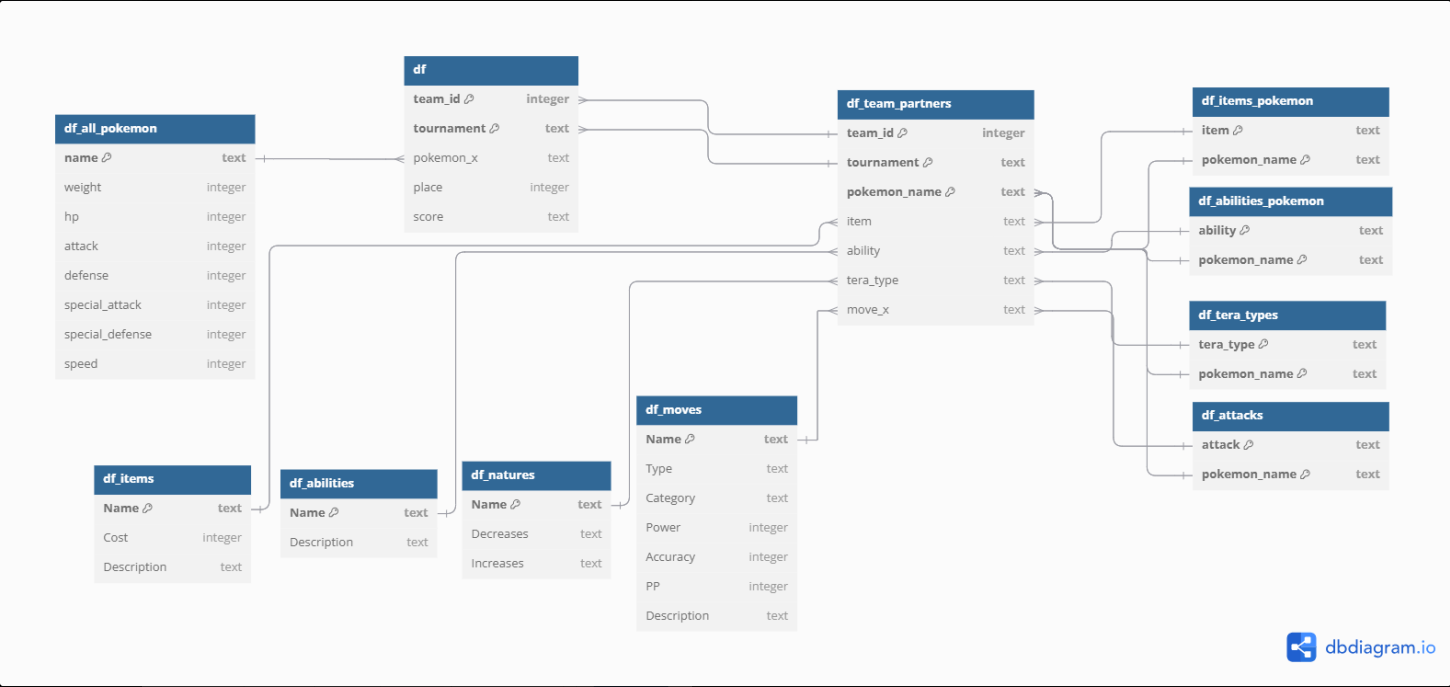

<div style="background-color:#006069; color:white; padding: 10px;"> <strong>Voorbeeld Query's</strong> </div>

##### Wat zijn SQL-queries?
SQL (Structured Query Language) is de standaardtaal voor het communiceren met relationele databases. Met SQL‑queries kun je:

- Data opvragen (SELECT): Haal specifieke gegevens op uit één of meer tabellen.
- Data toevoegen (INSERT): Voeg nieuwe records toe aan een tabel.
- Data aanpassen (UPDATE): Wijzig bestaande records.
- Data verwijderen (DELETE): Verwijder records uit een tabel.

In onze code gebruiken we SQL‑queries om:

- De lijst met tabellen in de database op te halen en weer te geven (met show_tables).
- De structuur van specifieke tabellen te inspecteren (met describe_table).

Deze methoden zijn cruciaal om te verifiëren dat onze database goed is opgezet en dat alle data correct is geladen. Ze vormen de basis voor verdere data-analyse en -manipulatie binnen ons project.

In [32]:
def execute_query(conn, query):
    """
    Voert een opgegeven SQL-query uit en retourneert het resultaat als een Pandas DataFrame.
    
    Parameters:
        conn: Het SQLite connection object.
        query (str): De SQL-query die uitgevoerd moet worden.
        
    Returns:
        Pandas DataFrame met de queryresultaten.
    """
    result = pd.read_sql_query(query, conn)
    return result

# Open de verbinding met de database
conn = open_connection()

# Voer een eenvoudige query uit: bijvoorbeeld de eerste 10 rijen uit de 'pokemon'-tabel
sample_query = "SELECT * FROM pokemon LIMIT 10;"
df_sample = execute_query(conn, sample_query)
print("\nVoorbeelddata uit de 'pokemon'-tabel:")
display(df_sample)

# Sluit de database-verbinding
close_connection(conn)


Voorbeelddata uit de 'pokemon'-tabel:


,id,name,weight,bug,dark,dragon,electric,fairy,fighting,fire,...,move_burning-bulwark,move_round,move_fire-blast,move_ancient-power,move_fury-attack,move_reversal,move_metal-sound,move_gust,move_copycat,move_instruct
0,1,bulbasaur,69,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2,ivysaur,130,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,venusaur,1000,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4,charmander,85,0,0,0,0,0,0,1,...,0,1,1,1,0,0,0,0,0,0
4,5,charmeleon,190,0,0,0,0,0,0,1,...,0,1,1,1,0,0,0,0,0,0
5,6,charizard,905,0,0,0,0,0,0,1,...,0,1,1,1,0,0,0,0,0,0
6,7,squirtle,90,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,8,wartortle,225,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,9,blastoise,855,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,10,caterpie,29,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Open de verbinding met de database
conn = open_connection()

# Voer een query uit om de eerste 10 fysieke Normal-type moves te selecteren, gesorteerd op Power in oplopende volgorde
sample_query = "SELECT * FROM moves WHERE Category = 'Physical' AND Type = 'Normal' ORDER BY Power DESC LIMIT 25;"
df_sample = execute_query(conn, sample_query)

# Print en toon de voorbeelddata uit de 'moves'-tabel
print("\nVoorbeelddata uit de 'moves'-tabel:")
display(df_sample)



Voorbeelddata uit de 'moves'-tabel:


,Name,Link,Type,Category,Power,Accuracy,PP,Description
0,Take Down,/moves/take-down,Normal,Physical,90,85,20,A tackle that also hurts the user.
1,Rock Climb,/moves/rock-climb,Normal,Physical,90,85,20,A charging attack that may also leave the foe ...
2,Raging Bull,/moves/raging-bull,Normal,Physical,90,100,10,-
3,Body Slam,/moves/body-slam,Normal,Physical,85,100,15,An attack that may cause paralysis.
4,Mega Punch,/moves/mega-punch,Normal,Physical,80,85,20,A powerful punch thrown very hard.
5,Slam,/moves/slam,Normal,Physical,80,75,20,"Slams the foe with a tail, vine, etc."
6,Strength,/moves/strength,Normal,Physical,80,100,15,A powerful physi­ cal attack.
7,Hyper Fang,/moves/hyper-fang,Normal,Physical,80,90,15,An attack that may cause flinching.
8,Extreme Speed,/moves/extreme-speed,Normal,Physical,80,100,5,A powerful first- strike move.
9,Crush Claw,/moves/crush-claw,Normal,Physical,75,95,10,Tears at the foe with sharp claws. May lower D...


Hier zien we een overzicht van alle moves die als Type Normal hebben en als Categorie Physical is. Ook is deze tabel gesorteert op hoe krachtig de move is

<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>Feature Engineering</strong></h2>
</div>

Om de prestaties van een team in een toernooi beter te begrijpen, willen we een nieuwe target variabele berekenen: het percentage van de teams dat een team heeft verslagen. Dit percentage geeft aan hoe goed een team heeft gepresteerd in vergelijking met de andere deelnemers.

We berekenen dit door te kijken naar de eindklassering van elk team binnen een toernooi en te bepalen hoeveel teams een slechtere positie hebben behaald. Dit percentage wordt vervolgens opgeslagen in een nieuwe kolom, win_percentage, die aangeeft hoe sterk een team was in dat specifieke toernooi.

Ons doel is om deze waarden te kunnen voorspellen. Als we in staat zijn om vooraf te schatten hoeveel procent van de teams een bepaald team zal verslaan, kunnen we beter inschatten hoe goed een team zal presteren in een toekomstig toernooi.

In [34]:
def calculate_percentage(df):
    df['score'] = df.groupby('tournament')['place'].transform(
        lambda x: ((len(x) - x.rank(method='max')) / (len(x) - 1) * 100).round(0)
    )
    return df

main_df = calculate_percentage(df)
main_df

,tournament,place,pokemon_1,pokemon_2,pokemon_3,pokemon_4,pokemon_5,pokemon_6,player_name,team_link,team_id,score
0,"28th September 2024 - Regional Joinville, Brazil",1st,garchomp,dragonite,amoonguss,incineroar,ninetales-alola,kingambit,Gabriel Agati,https://limitlessvgc.com/teams/319,319,84.0
1,"28th September 2024 - Regional Joinville, Brazil",2nd,dragonite,ninetales-alola,amoonguss,garchomp,incineroar,kingambit,Sebastian Escalante,https://limitlessvgc.com/teams/421,421,66.0
2,"28th September 2024 - Regional Joinville, Brazil",3rd,gastrodon,maushold,volcarona,sneasler,kingambit,baxcalibur,Juan Salerno,https://limitlessvgc.com/teams/422,422,50.0
3,"28th September 2024 - Regional Joinville, Brazil",4th,primarina,vivillon,porygon2,garchomp,gholdengo,incineroar,Luiz Lima,https://limitlessvgc.com/teams/423,423,32.0
4,"28th September 2024 - Regional Joinville, Brazil",5th,annihilape,basculegion,archaludon,amoonguss,pelipper,maushold,João Gonçalves,https://limitlessvgc.com/teams/424,424,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
620,"7th January 2023 - Regional San Diego, USA",24th,sylveon,annihilape,armarouge,talonflame,maushold,meowscarada,Dawei Si,https://limitlessvgc.com/teams/275,275,44.0
621,"7th January 2023 - Regional San Diego, USA",25th,salamence,gholdengo,armarouge,indeedee-f,skeledirge,breloom,Nathan Ortiz,https://limitlessvgc.com/teams/276,276,41.0
622,"7th January 2023 - Regional San Diego, USA",26th,hydreigon,annihilape,arcanine,maushold,rotom-wash,amoonguss,Joshua Lorcy,https://limitlessvgc.com/teams/277,277,37.0
623,"7th January 2023 - Regional San Diego, USA",27th,azumarill,gholdengo,dragonite,maushold,skeledirge,meowscarada,Jonathan Zuniga,https://limitlessvgc.com/teams/278,278,33.0


<div style="background-color:#006069; color:white; padding: 10px;"> <strong>Toelichting</strong> </div>
In de onderstaande code voegen we de statistieken van de Pokémon uit df_all_pokemon toe aan de bestaande dataset main_df. Voor elke Pokémon (pokemon_1 t/m pokemon_6) in main_df voegen we de bijbehorende statistieken zoals gewicht, HP, aanval, verdediging, speciale aanval, speciale verdediging en snelheid toe als nieuwe kolommen (bijvoorbeeld p1_weight, p1_hp, etc.).
pokemon_columns = ['weight', 'hp', 'attack', 'defense', 'special-attack', 'special-defense', 'speed']

In [35]:
pokemon_columns = ['weight', 'hp', 'attack', 'defense', 'special-attack', 'special-defense', 'speed']

# Loop through the pokemon columns in main_df (pokemon_1 to pokemon_6)
for i in range(1, 7):  
    # Merge stats for each pokemon column, rename them to match the format p1_weight, p1_hp, etc.
    stats_df = df_all_pokemon[['name'] + pokemon_columns].copy()
    stats_df.rename(columns={col: f'p{i}_{col}' for col in pokemon_columns}, inplace=True)
    
    # Merge the stats for the current pokemon
    main_df = main_df.merge(stats_df, left_on=f'pokemon_{i}', right_on='name', how='left').drop('name', axis=1)

<div style="background-color:#006069; color:white; padding: 10px;"> <strong>Toelichting</strong> </div>
Een sterk Pokémon-team heeft een gevarieerde spreiding van types, omdat elk type sterke en zwakke tegenstanders heeft. Bijvoorbeeld, 'water' is sterk tegen 'fire', maar zwak tegen 'electric'. Door verschillende types in je team te hebben, kun je beter reageren op verschillende tegenstanders en effectief counteren.

Met de onderstaande code berekenen we voor elk team in main_df het aantal Pokémon per type. Dit geeft ons inzicht in de typebalans van elk team

In [36]:
type_columns = ['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire', 
                'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 
                'psychic', 'rock', 'steel', 'water']

# Functie om de types van een Pokémon in main_df te tellen
def count_types_in_team(team_row, df_all_pokemon, type_columns):
    # Maak een dictionary om het aantal types bij te houden
    type_counts = {type_col: 0 for type_col in type_columns}
    
    # Loop door de Pokémon in het team (pokemon_1 tot pokemon_6)
    for pokemon in team_row:
        pokemon_types = df_all_pokemon[df_all_pokemon['name'] == pokemon]
        
        if not pokemon_types.empty:
            for type_col in type_columns:
                if pokemon_types[type_col].values[0]:
                    type_counts[type_col] += 1
                    
    return type_counts

# Voeg de nieuwe typekolommen toe aan main_df
for index, row in main_df.iterrows():
    # Haal de Pokémon in het team (pokemon_1 tot pokemon_6)
    team_row = row[['pokemon_1', 'pokemon_2', 'pokemon_3', 'pokemon_4', 'pokemon_5', 'pokemon_6']].values
    
    # Krijg het aantal types voor dit team
    type_counts = count_types_in_team(team_row, df_all_pokemon, type_columns)
    
    # Voeg de resultaten toe als nieuwe kolommen in main_df
    for type_col, count in type_counts.items():
        main_df.at[index, type_col] = count

<div style="background-color:#006069; color:white; padding: 10px;"> <strong>Inspecteren van het dataframe</strong> </div>

In [37]:
pd.set_option('display.max_columns', None)
main_df = main_df.drop(columns=['tournament', 'place', 'pokemon_1', 'pokemon_2', 'pokemon_3', 'pokemon_4', 'pokemon_5', 'pokemon_6', 'player_name', 'team_link', 'team_id'])
main_df

,score,p1_weight,p1_hp,p1_attack,p1_defense,p1_special-attack,p1_special-defense,p1_speed,p2_weight,p2_hp,p2_attack,p2_defense,p2_special-attack,p2_special-defense,p2_speed,p3_weight,p3_hp,p3_attack,p3_defense,p3_special-attack,p3_special-defense,p3_speed,p4_weight,p4_hp,p4_attack,p4_defense,p4_special-attack,p4_special-defense,p4_speed,p5_weight,p5_hp,p5_attack,p5_defense,p5_special-attack,p5_special-defense,p5_speed,p6_weight,p6_hp,p6_attack,p6_defense,p6_special-attack,p6_special-defense,p6_speed,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
0,84.0,950.0,108.0,130.0,95.0,80.0,85.0,102.0,2100.0,91.0,134.0,95.0,100.0,100.0,80.0,105.0,114.0,85.0,70.0,85.0,80.0,30.0,830.0,95.0,115.0,90.0,80.0,90.0,60.0,199.0,73.0,67.0,75.0,81.0,100.0,109.0,1200.0,100.0,135.0,120.0,60.0,85.0,50.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,66.0,2100.0,91.0,134.0,95.0,100.0,100.0,80.0,199.0,73.0,67.0,75.0,81.0,100.0,109.0,105.0,114.0,85.0,70.0,85.0,80.0,30.0,950.0,108.0,130.0,95.0,80.0,85.0,102.0,830.0,95.0,115.0,90.0,80.0,90.0,60.0,1200.0,100.0,135.0,120.0,60.0,85.0,50.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50.0,299.0,111.0,83.0,68.0,92.0,82.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,460.0,85.0,60.0,65.0,135.0,105.0,100.0,430.0,80.0,130.0,60.0,40.0,80.0,120.0,1200.0,100.0,135.0,120.0,60.0,85.0,50.0,2100.0,115.0,145.0,92.0,75.0,86.0,87.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,32.0,440.0,80.0,74.0,74.0,126.0,116.0,60.0,170.0,80.0,52.0,50.0,90.0,50.0,89.0,325.0,85.0,80.0,90.0,105.0,95.0,60.0,950.0,108.0,130.0,95.0,80.0,85.0,102.0,300.0,87.0,60.0,95.0,133.0,91.0,84.0,830.0,95.0,115.0,90.0,80.0,90.0,60.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,15.0,560.0,110.0,115.0,80.0,50.0,90.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.0,90.0,105.0,130.0,125.0,65.0,85.0,105.0,114.0,85.0,70.0,85.0,80.0,30.0,280.0,60.0,50.0,100.0,95.0,70.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,44.0,235.0,95.0,65.0,65.0,110.0,130.0,60.0,560.0,110.0,115.0,80.0,50.0,90.0,90.0,850.0,85.0,60.0,100.0,125.0,80.0,75.0,245.0,78.0,81.0,71.0,74.0,69.0,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312.0,76.0,110.0,70.0,81.0,70.0,123.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
621,41.0,1026.0,95.0,135.0,80.0,110.0,80.0,100.0,300.0,87.0,60.0,95.0,133.0,91.0,84.0,850.0,85.0,60.0,100.0,125.0,80.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3265.0,104.0,75.0,100.0,110.0,75.0,66.0,392.0,60.0,130.0,80.0,60.0,60.0,70.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
622,37.0,1600.0,92.0,105.0,90.0,125.0,90.0,98.0,560.0,110.0,115.0,80.0,50.0,90.0,90.0,1550.0,90.0,110.0,80.0,100.0,80.0,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,50.0,65.0,107.0,105.0,107.0,86.0,105.0,114.0,85.0,70.0,85.0,80.0,30.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
623,33.0,285.0,100.0,50.0,80.0,60.0,80.0,50.0,300.0,87.0,60.0,95.0,133.0,91.0,84.0,2100.0,91.0,134.0,95.0,100.0,100.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3265.0,104.0,75.0,100.0,110.0,75.0,66.0,312.0,76.0,110.0,70.0,81.0,70.0,123.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


<div style="background-color:#006069; color:white; padding: 10px;"> <strong>Vervolg stappen</strong> </div>

Naar aanleiding van de stappen die we hebben doorlopen met feature engineering, beschikken we nu over een dataset die geschikt is voor het trainen van modellen. Als er aanvullende informatie nodig is, kunnen we eenvoudig extra features toevoegen door gebruik te maken van onze uitgebreide database. Zo kunnen we bijvoorbeeld gegevens toevoegen over de moves, items, en de abilities die de pokemon bezitten.